### Analyzing Public Opinion on the Canadian Political Landscape Through Sentiment Analysis of 2021 Election Tweets.

### Developed by Keyan Ahmadi

### Step 1:  Data cleaning

In [1]:
#Installing the demoji
#pip install demoji

In [2]:
# First Loading All Important Libraries 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

# Libraries related to modifying texts 
import demoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
# Printing the current version of Python:
print(sys.version)

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [5]:
from google.colab import files 
files = files.upload()

Saving Canadian_elections_2021.csv to Canadian_elections_2021 (1).csv
Saving sentiment_analysis.csv to sentiment_analysis (1).csv


In [6]:
# loading in the CSV file and converting it to a pandas dataframe
pd.set_option('display.max_colwidth', 100)

SAnalysis_DF = pd.read_csv("sentiment_analysis.csv", low_memory=False) # loading in the sentiment analysis data
CElec_2021_DF = pd.read_csv("Canadian_elections_2021.csv", low_memory=False) # loading in the Canadian elections 2021 data

In [7]:
 # Finding the amount of rows and columns in the dataframe
print("The Shape of the Sentiment Analysis DataFrame is:", SAnalysis_DF.shape)
SAnalysis_DF.head() # Printing the first 5 rows to see if the file is being read properly

The Shape of the Sentiment Analysis DataFrame is: (550391, 3)


,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving pa...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @C...,1


binary values 0 (negative) and 1 (positive)

In [8]:
 # Finding the amount of rows and columns in the dataframe
print("The Shape of the Canadian elections 2021 DataFrame is:", CElec_2021_DF.shape)
CElec_2021_DF.head() # Printing the first 5 rows to see if the file is being read properly

The Shape of the Canadian elections 2021 DataFrame is: (1002, 3)


,text,sentiment,negative_reason
0,"The Canadian election is a power grab by PM Trudeau, yes -- to take it away from the opposition ...",negative,calling election early
1,"I do hope Trudeau loses the Canadian election tomorrow , called a snap one thinking he’d romp it...",negative,covid
2,"Dear Canadians, This election is a test of how progressive we are. Whether we stand by science, ...",positive,NaN
3,Canadian friends: Never forget that Trudeau had 2 more years on his mandate + called a completel...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my f...,positive,NaN


In [9]:
# Making copies of the DataFrames so I can used the unalter copy of the DataFrame in part 2 to find keywords
Election_OG_DF = CElec_2021_DF.copy()
sentiment_OG_DF = SAnalysis_DF.copy()

#### Designing A procedure that does the Following 

1.	Removing all the emojis. 
2.	Removing all the URLs. 
3.	Making all the characters lower case. 
4.	Removing the stop words. 
5.	Removing all the punctuations. 
6.	Lemmatizing the text. 

In [10]:
# 1- Defining a Function that removes Emojies 
def Emoji_Del(twt):
    
    """ This function removes all emojies within the text """
    
    Every_emoji_list = demoji.findall(twt)
    for i in Every_emoji_list.keys():
        twt = twt.replace(i, "")
    return twt

In [11]:
# Check: Seeing if the above function works
Example_Text = CElec_2021_DF["text"][4]
print ("Text Before Emoji Removel:\n", Example_Text)
print("")
print ("Text After Emoji Removel:\n",Emoji_Del(Example_Text))

Text Before Emoji Removel:
 Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my freedoms as a Canadian. I voted last Saturday for @MaxineBernier of the @peoplespca #ppc #VotePPC2021 #VoteForHumanRights #voteforfreedom #maximebernier #PurpleReign #freedom 🇨🇦💜🇨🇦💜🇨🇦

Text After Emoji Removel:
 Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my freedoms as a Canadian. I voted last Saturday for @MaxineBernier of the @peoplespca #ppc #VotePPC2021 #VoteForHumanRights #voteforfreedom #maximebernier #PurpleReign #freedom 


In [12]:
# 2- Defining a function that removes all the URLs 
def URL_Del(txt):
    
    """ This function removes https"""
    
    url = re.compile(r"https?://\S+|www\.\S+")
    
    return url.sub(r"", txt)

In [13]:
# Check: Seeing if the above function works
Example_URL = CElec_2021_DF["text"][55]
print ("Text Before URL Removel:\n", Example_URL)
print("")
print ("Text After URL Removel:\n", URL_Del(Example_URL))

Text Before URL Removel:
 🍁🍁 Trudeau has kept 92% of his promises since 2015. They've worked 24/7 for Canadians during the pandemic. O'Toole's HarperCons obstructed.  O'Toole wants this election to be a referendum on Trudeau. Trudeau needs voters to see a stark choice. | CBC News  https://t.co/PMEdzAA05f

Text After URL Removel:
 🍁🍁 Trudeau has kept 92% of his promises since 2015. They've worked 24/7 for Canadians during the pandemic. O'Toole's HarperCons obstructed.  O'Toole wants this election to be a referendum on Trudeau. Trudeau needs voters to see a stark choice. | CBC News  


In [14]:
# 3- Defining a function that lowercases all the characters in the text
def Text_Lower(txt):
    
    """ This function lowercases texts"""
    
    lower_txt = txt.lower()
    
    return lower_txt

In [15]:
# Check: Seeing if the above function works
Example_Text = CElec_2021_DF["text"][85]
print ("Text Before Lower Casing the Characters:\n", Example_Text)
print("")
print ("Text After Lower Casing the Characters:\n", Text_Lower(Example_Text))

Text Before Lower Casing the Characters:
 Just have a read @MsAmyMacPherson Yes Erin OToole rhetoric has incited such divisive toxic protesters. Don’t see protesters near OToole. OToole has done zero to aid #GetVaccinated #VaccinesSaveLives during #COVID19. PMJT has led Canada; OToole #UnfitToBePM #VoteLiberal✅ #Elxn44

Text After Lower Casing the Characters:
 just have a read @msamymacpherson yes erin otoole rhetoric has incited such divisive toxic protesters. don’t see protesters near otoole. otoole has done zero to aid #getvaccinated #vaccinessavelives during #covid19. pmjt has led canada; otoole #unfittobepm #voteliberal✅ #elxn44


In [16]:
# Downloading stop words
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# 4- Defining a function that removes all the stop words 
def remove_stop_wrds (txt):
    """ This function removes all the stop words in the text"""
    
    # Considering the ntlk english stopwords 
    stop_words = set(stopwords.words("english"))
    
    # Tokenizing the given text 
    token_text = word_tokenize(txt)
    
    Non_stop_words = [] # Creating a empty list to house all the non stop words in the text 
    for i in token_text:
        if i not in stop_words:
            Non_stop_words.append(i)
    
    Non_stop_words = " ".join(Non_stop_words)
    
    return Non_stop_words

In [18]:
# Check: Seeing if the above function works
Example_Text = CElec_2021_DF["text"][91]
print ("Text Before Stop Word Removal:\n", Example_Text)
print("")
print ("Text After Stop Word Removal:\n", remove_stop_wrds(Example_Text))

Text Before Stop Word Removal:
 Selley: O'Toole's Teflon coating is a new look for Conservative leaders, via @NationalPost This election is becoming an antiTrudeau vote rather than voting for platform which is a bit disconcerting. However I still believe O”Toole is the only choice !   https://t.co/FmC4Bk0VKc

Text After Stop Word Removal:
 Selley : O'Toole 's Teflon coating new look Conservative leaders , via @ NationalPost This election becoming antiTrudeau vote rather voting platform bit disconcerting . However I still believe O ” Toole choice ! https : //t.co/FmC4Bk0VKc


In [19]:
# 5- Defining a function to remove all punctuations
# Printing all the punctuation for the string package
print(string.punctuation)

def Punc_Del(txt):
    
    """This function removes all punctuations"""
    Non_punc_words = []
    for i in txt:
        if i not in string.punctuation:
            Non_punc_words.append(i)
    
    # The above Non_punc_words will have each word separated by an "empty space" and each string separated by
    # an "comma", this is visually unpleasing and therefore we will join each string to form a word with still
    # keeping each word separated by using "".join
    
    Non_punc_words = "".join(Non_punc_words)
            
    return Non_punc_words

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
Example_Text = CElec_2021_DF["text"][23]
print ("Text Before Punctuation Removal:\n", Example_Text)
print("")
print ("Text After Punctuation Removal:\n", Punc_Del(Example_Text))

Text Before Punctuation Removal:
 Tomorrow is Election Day.  Nervous puts it mildly.   They say we get the government we deserve.  If that is true, @erinotoole better buckle up.    He’s got a lot of work to do!  Wishing the CPC a huge victory.  Canadians deserve nothing more.   Hoping tomorrow is brighter for 🇨🇦!

Text After Punctuation Removal:
 Tomorrow is Election Day  Nervous puts it mildly   They say we get the government we deserve  If that is true erinotoole better buckle up    He’s got a lot of work to do  Wishing the CPC a huge victory  Canadians deserve nothing more   Hoping tomorrow is brighter for 🇨🇦


In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Defining a function that performs lemmatization on a text
def lemmatizer_txt (txt):
    lemmatizer = nltk.WordNetLemmatizer()
    token_text = word_tokenize(txt)
    
    lemmatizer_list = []
    for i in token_text:
        lemmatizer_list.append(lemmatizer.lemmatize(i))
        
    lemmatizer_list = " ".join(lemmatizer_list) 
    
    return lemmatizer_list

In [23]:
# Defining a function to remove all the empty spaces between words
def Empty_Space_Del(txt):
   
   """This function removes empty spaces"""
   
   txt=re.sub(r' +', ' ', txt) 
   return txt

In [24]:
# Data cleaning: Applying all the above functions to the dataset 
for i in range (0, CElec_2021_DF.shape[0]):
    
    CElec_2021_DF["text"][i] = Emoji_Del(CElec_2021_DF["text"][i])
    CElec_2021_DF["text"][i] = URL_Del(CElec_2021_DF["text"][i])    
    CElec_2021_DF["text"][i] = Text_Lower(CElec_2021_DF["text"][i])
    CElec_2021_DF["text"][i] = Punc_Del(CElec_2021_DF["text"][i])
    CElec_2021_DF["text"][i] = remove_stop_wrds(CElec_2021_DF["text"][i])
    CElec_2021_DF["text"][i] = lemmatizer_txt(CElec_2021_DF["text"][i])
    CElec_2021_DF["text"][i] = Empty_Space_Del(CElec_2021_DF["text"][i])

In [25]:
CElec_2021_DF.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,negative,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,negative,covid
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,positive,NaN
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxi...,positive,NaN


In [26]:
# Data cleaning: Applying all the above functions to the sentiment analysis dataset 
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(Emoji_Del)
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(URL_Del) 
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(Text_Lower)
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(Punc_Del)
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(remove_stop_wrds)
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(lemmatizer_txt)
SAnalysis_DF["text"] = SAnalysis_DF["text"].apply(Empty_Space_Del)

In [27]:
# Removing "rt" from the text column
SAnalysis_DF['text'] = SAnalysis_DF['text'].str.replace("rt", "") 

In [28]:
SAnalysis_DF.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeder crown super sunday,1
1,7.680980e+17,mianusmanjaved congratulation pakistan becoming no1testteam world odds jipakzindabadrallies,1
2,7.680980e+17,pepales september yesmag taking maine mendoza ’ surprise thanksgiving pay threw fan,1
3,7.680980e+17,davidgaibis newly painted wall thanks million custodial painter summer great job ladiesecproud,1
4,7.680980e+17,cedricfeschotte excited announce july 2017 feschotte lab relocating cornell mbg,1


### 2. Step 2: Exploratory Data Analysis 

Designing a procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset

In [29]:
# Defining a function that finds the hashtags in a column in a dataframe 
def Hashtag_Find (df_column):

    Hashtag_List =[]                        # making empty list to house all the hashtags
    for i in range (0, df_column.shape[0]): # looping through all the rows of the DataFrame
        text_i = df_column.iloc[i][0]
        Hashtags = re.findall(r"#(\w+)", text_i) # finding hashtags in text
        if len(Hashtags)>0:
            Hashtag_List.append(Hashtags)
    
    # Removing the sublist within the Hashtag_List 
    Hashtag_List  = [x for sub_list in Hashtag_List for x in sub_list] 
            
    return Hashtag_List

In [30]:
# Defining a function that finds the @ (mentiones) in a column in a dataframe 
def Mention_Find (df_column):

    mention_List =[]                        # making empty list to house all the hashtags
    for i in range (0, df_column.shape[0]): # looping through all the rows of the DataFrame
        text_i = df_column.iloc[i][0]
        mentions = re.findall(r"@(\w+)", text_i) # finding hashtags in text
        if len(mentions)>0:
            mention_List.append(mentions)
    
    # Removing the sublist within the Hashtag_List 
    mention_List  = [x for sub_list in mention_List for x in sub_list] 
            
    return mention_List

Both Function above will be used to find relevant Hashtags and Mentions to be used as keywords for each party later on 

In [32]:
# Finding the counts of all the hastags in a DataFrame 
Hashtags = Hashtag_Find (Election_OG_DF[["text"]])
pd.value_counts(np.array(Hashtags)).head(60)

Elxn44                   95
cdnpoli                  79
NeverVoteConservative    51
VotePPC                  43
VoteLiberal              38
IStandWithTrudeau        22
elxn44                   20
OToole                   19
PPC                      14
elections2021            14
VoteLiberalMajority      11
ForwardForEveryone       10
NeverVoteCPC             10
Canada                    9
canadaelection            9
VotePPC2021               9
LiberalMajority           7
OTooleForPM               6
LeadersDebate             6
VoteTrudeauOut            6
debatdeschefs             6
Conservative              6
polcan                    5
PurpleWave                5
Election2021              5
NDP                       5
Trudeau                   5
FlipFlopOtoole            5
canada                    4
COVID19                   4
VoteConservative          4
onpoli                    4
JustinTrudeau             4
MaximeBernier             4
canadianelection          4
CPC                 

In [33]:
Mention = Mention_Find(Election_OG_DF[["text"]])
pd.value_counts(np.array(Mention)).head(20)

JustinTrudeau      86
erinotoole         69
theJagmeetSingh    21
CPC_HQ             13
MaximeBernier      12
liberal_party      12
suzannealma         7
CBCNews             6
davidakin           6
CTVNews             5
peoplespca          5
BarackObama         5
acoyne              5
MercedesGlobal      5
DonMartinCTV        5
krismeloche         5
kinsellawarren      4
glen_mcgregor       4
globalnews          4
sunlorrie           4
dtype: int64

In [34]:
# Creating a copy Dataframe to loop through in the next step to find the keywords for each party 
Election_DF_Part2 = Election_OG_DF[["text"]].copy()
Election_DF_Part2["text"] = Election_DF_Part2["text"].apply(Text_Lower) # lowercasing the words 
Election_DF_Part2['tokenized_text'] = Election_DF_Part2.apply(lambda row: word_tokenize(row['text']), axis=1) # tokenizing each word
Election_DF_Part2 = Election_DF_Part2.drop(columns = ["text"],axis=0) # Dropping column that isnt necessary 

In [35]:
# Making a new column with an empty list to house all parties associated with a tweet
Election_OG_DF["Party"] = pd.np.empty((len(Election_OG_DF), 0)).tolist()

### Defining the list of keywords for each party: 
# list of keywords related to the Libral party (Both positive and negative)
Liberal_Key_Words = ["trudeau", "justintrudeau", "liberal", "liberals", "democrat", "democrats", "voteliberal","istandwithtrudeau", "voteliberalmajority", 
                     "liberalmajority", "votetrudeauout", "red", "liberal_party","#trudeau", "#justintrudeau", "trudeaucrimeminister", "trudeaumustgo", 
                     "trudeau,", "justintrudeau"]

# list of keywords related to the conservative party (Both positive and negative)                    
Conservative_Key_Words = ["erinotoole", "otoole", "o'toole", "erino'toole", "erin", "Conservative", "conservative","Conservatives", "republican", "republicans",
                          "nevervoteconservative", "blue", "trump","nevervotecpc", "otooleforpm", "cpc", "stephenharper" , "stephen", "harper", 
                          "flipflopotoole", "voteconservative", "#conservatives", "@erinotoole", "toole", "conservatives", "hotoole"]

# list of keywords related to the New Democratic Party (Both positive and negative)
NDP_Key_Words = ["ndp", "newdemocraticparty", "jagmeet", "singh", "jagmeetsingh", "jagmeetsinghjimmydhaliwa", "votendp","#ndp", "ndp2021", "jack", "layton", 
                 "jacklayton", "Orange", "thejagmeetsingh", "@thejagmeetsingh"]

# list of keywords related to the Peoples Party of Canada (Both positive and negative)
PPC_Key_Words = ["ppc", "voteppc", "#ppc", "voteppc2021", "#maximebernier", "maximebernier", "maxime", "bernier", "maximebernierforpm","purplewave","purple", 
                 "makemaxourpm", "peoplespca","purplereign", "@MaximeBernier", "@peoplespca"]

# Initiating a count to find the total number of tweets that had Liberal, Conservative, PPC and NDP keywords 
lib_count = 0 
ndp_count = 0
con_count = 0 
ppc_count = 0

###### --- Finding which tweet is related to which party --- ###### 
for i in range (0, Election_DF_Part2.shape[0]):
    
    if any(elem in Election_DF_Part2.loc[i,:].tolist()[0]  for elem in Liberal_Key_Words):
      lib_count = lib_count + 1 
      Election_OG_DF["Party"][i].append("Lib")

    if any(elem in Election_DF_Part2.loc[i,:].tolist()[0]  for elem in Conservative_Key_Words):
      con_count = con_count + 1
      Election_OG_DF["Party"][i].append("CPC")
      
    if any(elem in Election_DF_Part2.loc[i,:].tolist()[0]  for elem in NDP_Key_Words):
      ppc_count = ppc_count + 1 
      Election_OG_DF["Party"][i].append("PPC")
    
    if any(elem in Election_DF_Part2.loc[i,:].tolist()[0]  for elem in PPC_Key_Words):
      ndp_count = ndp_count + 1 
      Election_OG_DF["Party"][i].append("NDP")

# Assigning the label "No Party Affiliation" to the tweets that were not related directly to any political party 
Election_OG_DF["Party"] = Election_OG_DF["Party"].apply(lambda x: ["No Party Affiliation"] if not x else x)

# Converting the list type elements in the Party column to string type
Election_OG_DF["Party"] = Election_OG_DF["Party"].apply(lambda x: ", ".join([str(s) for s in x]))

Election_OG_DF.head() # printing the first 5 rows to see if everything is working properly 

,text,sentiment,negative_reason,Party
0,"The Canadian election is a power grab by PM Trudeau, yes -- to take it away from the opposition ...",negative,calling election early,Lib
1,"I do hope Trudeau loses the Canadian election tomorrow , called a snap one thinking he’d romp it...",negative,covid,Lib
2,"Dear Canadians, This election is a test of how progressive we are. Whether we stand by science, ...",positive,NaN,No Party Affiliation
3,Canadian friends: Never forget that Trudeau had 2 more years on his mandate + called a completel...,negative,calling election early,Lib
4,Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my f...,positive,NaN,"PPC, NDP"


In [36]:
# Making a Summary DataFrame of all the tweets that were related to a political party
dict_party_result = {"Liberal Party": lib_count, "Conservative Party": con_count, 
                     "Peoples Party of Canada":ppc_count, "New Democratic Party": ndp_count}

Party_DF = pd.DataFrame.from_dict(dict_party_result,orient='index', columns=["Number of Tweets"])
Party_DF = Party_DF.reset_index(level=0)
Party_DF.rename(columns={'index': 'Political Party'}, inplace=True)
print ("Summary DataFrame:")
print ("Note: The Number of Tweets for each party represents how many tweets had keywords related to that party")
Party_DF

Summary DataFrame:
Note: The Number of Tweets for each party represents how many tweets had keywords related to that party


,Political Party,Number of Tweets
0,Liberal Party,472
1,Conservative Party,376
2,Peoples Party of Canada,76
3,New Democratic Party,107


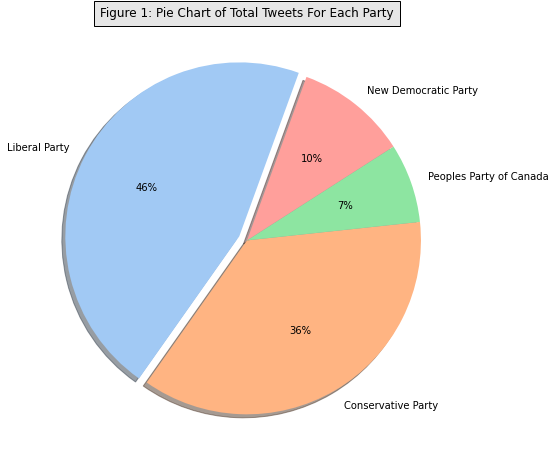

In [37]:
# Creating a Pie Chart to present a visual representation of the breakdown of the total politcal tweets based on the parties involved in the 2021 election

# Setting the piechart color scheme
colors = sns.color_palette('pastel')[0:4]
# Only exploding the 1st slice ("Liberal Party")
explode = (0.05, 0.0, 0, 0) 

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(Party_DF["Number of Tweets"], labels = Party_DF["Political Party"], explode=explode, colors = colors, shadow=True, startangle=70, 
        radius=1, autopct='%.0f%%')

plt.title("Figure 1: Pie Chart of Total Tweets For Each Party", bbox={'facecolor':'0.9', 'pad':6})
plt.show()

In [38]:
# Re-ordering the Party column for a better visual representation for the following bar plot in the next step
Election_OG_DF['Party_order'] = pd.Categorical(Election_OG_DF['Party'], ['No Party Affiliation','Lib','CPC','Lib, CPC', 'NDP','PPC','Lib, CPC, NDP','CPC, NDP',
                                                                         'Lib, PPC', 'Lib, CPC, PPC','Lib, NDP', 'CPC, PPC', 'Lib, CPC, PPC, NDP','PPC, NDP',
                                                                         'Lib, PPC, NDP'])

Text(0.5, 1.0, 'Figure 2: Bar Plot Illustrating which Parties Were Involved For a Given Tweet')

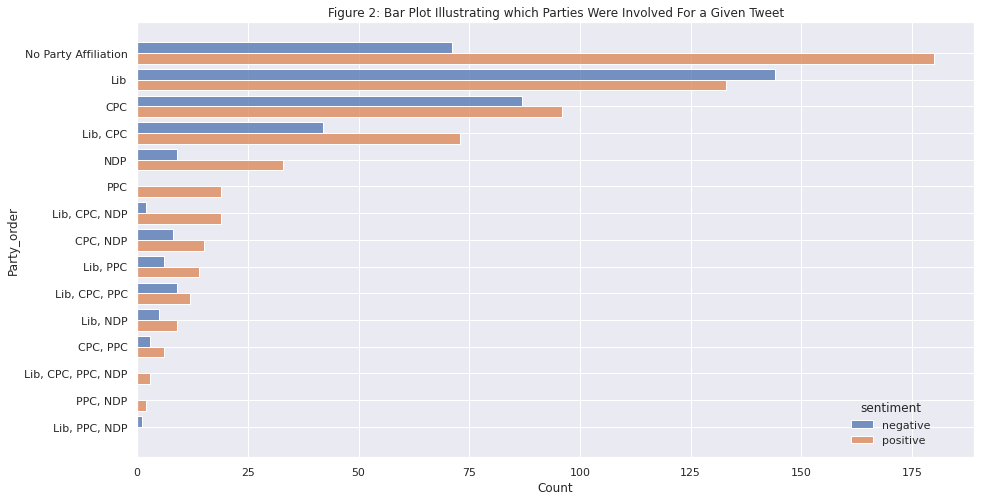

In [39]:
# Plotting the bar plot of the political parties of each tweet
sns.set(style="darkgrid")
plt.figure(figsize = (15,8))
ax = sns.histplot(data=Election_OG_DF, y="Party_order", hue = "sentiment",multiple="dodge", shrink=0.8, legend=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.9, 0.005),frameon=False,)
plt.title("Figure 2: Bar Plot Illustrating which Parties Were Involved For a Given Tweet")

In [40]:
# Slicing the DataFrame for just the tweets that have no party affiliation
No_Party_Affiliation_DF = Election_OG_DF [ Election_OG_DF["Party"] == "No Party Affiliation"]

# Cleaning the text column in the No Party Affiliation DataFrame
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(Emoji_Del)
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(URL_Del) 
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(Text_Lower)
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(Punc_Del)
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(remove_stop_wrds)
No_Party_Affiliation_DF["text"] = No_Party_Affiliation_DF["text"].apply(lemmatizer_txt)

# printing the first 5 rows in the DataFrame
No_Party_Affiliation_DF.head()

,text,sentiment,negative_reason,Party,Party_order
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,positive,NaN,No Party Affiliation,No Party Affiliation
6,’ sorry moderator respond leadership candidate ’ debate farce frankly disservice canadian awful ...,negative,others,No Party Affiliation,No Party Affiliation
7,say ive skeptical critical mainstream canadian journalism never seen level trying choose winneri...,negative,others,No Party Affiliation,No Party Affiliation
12,throwbackthursday federal election debate night 2019 ready tie happens election2021 debate night...,positive,NaN,No Party Affiliation,No Party Affiliation
13,ive felt time confidence party best instinct dealing pandemic settle lot vote election canadian ...,positive,NaN,No Party Affiliation,No Party Affiliation


In [41]:
# Tokenizing the text column of the No Party Affiliation DataFrame
No_Party_Affiliation_DF['tokenized_text'] = No_Party_Affiliation_DF.apply(lambda row: word_tokenize(row['text']), axis=1)

No_Party_Affiliation_DF[["tokenized_text"]].head()

,tokenized_text
2,"[dear, canadian, election, test, progressive, whether, stand, science, woman, ’, bipoc, right, e..."
6,"[’, sorry, moderator, respond, leadership, candidate, ’, debate, farce, frankly, disservice, can..."
7,"[say, ive, skeptical, critical, mainstream, canadian, journalism, never, seen, level, trying, ch..."
12,"[throwbackthursday, federal, election, debate, night, 2019, ready, tie, happens, election2021, d..."
13,"[ive, felt, time, confidence, party, best, instinct, dealing, pandemic, settle, lot, vote, elect..."


(-0.5, 499.5, 499.5, -0.5)

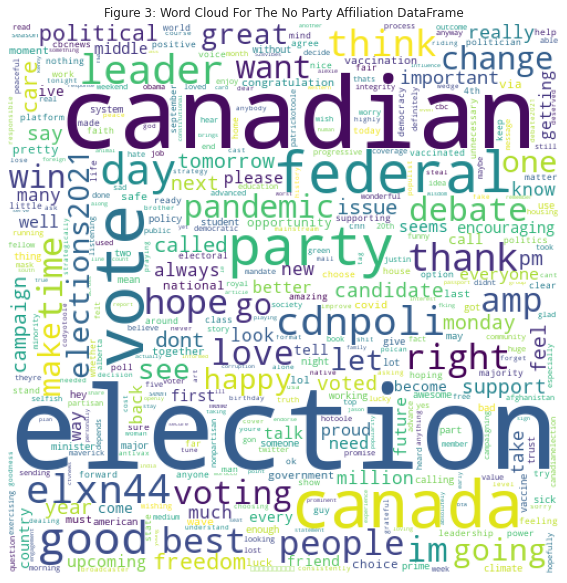

In [42]:
# Creating the word cloud Figure for the No Party Affiliation DataFrame, I do this to have a better understanding on what the tweets that are not related
# to any political parties are about

word_cloud_No_Party = WordCloud (max_words=1000, background_color="white", min_font_size=5, collocations = False, 
                                 max_font_size=110, width = 500, height = 500).generate(" ".join(No_Party_Affiliation_DF.tokenized_text
                                                                                                 .apply(lambda x: " ".join(x))))
                                 
# Visualizing The Generated Word Cloud Figure For The No Party Affiliation DataFrame 
plt.figure(figsize = (12, 8)) 
plt.imshow(word_cloud_No_Party) 
plt.tight_layout(pad = 0)
plt.title("Figure 3: Word Cloud For The No Party Affiliation DataFrame") 
plt.axis("off") 

 ### The following can be said about the distribution of the political affiliations of the tweets:

As we can see in Figure 1 (Pie Chart), majority of the tweets that were aimed to Canada's political party sent by the general public is related to the Liberal and Conservative Party, making a combine percentage of 82% (46% Liberal and 36% Conservative). This makes sense as the two parties (Liberal and Conservative) are the two most oldest (Ref1) and popular political parties in canada (Ref2). As shown in Ref2, from election year 2004, majority of the seats were won either by Liberal or Conservative Parties. After the Liberal and Conservative parties, majority of the tweets were related the New Democratic Party (NDP) (10%) and then People's Party of Canada (PPC) (7%). This makes sense and can be supported if we look at the Canada's 2019 election year. In 2019, NDP had 24 elected members where PPC had 0 elected members (Ref2). 

Figure 2 (Bar Plot Illustrating which Parties Were Involved For a Given Tweet) substantiates the above claim, that the majority of people tweeting are interested in either the Liberal or Conservative party. The top 3 tweet frequency in the bar plot is related to first the Liberal Party, second to the Conservative Party and Third tweets that are both addressing the Liberal and Conservative parties (when not considering No Party Affiliation tweets). The next runner ups are the NDP and PPC parties (as claimed above). We can also see that people dont often just tweet regarding a combination of the parties or all of the parties. 

By looking at Figure 3 (Word Cloud For No Party Affiliation Tweets) we can see alot of people are spreading the news of the canadian 2021 election, promoting to vote, and other general political terms to promote positivity. At each election people tend to advocate for voting in general, not just for a particular party as the number of votes in a election represnets how strong democracy is. This makes sense why in Figure 2, we see a large portion of tweets in this category as many Canadain are just advocating for their democracy. Essentially Canadians are just promoting positivity and this substansiated by the amount of postive sentiment tweets in this category.

Based on the distribution seen in Figures 1 and 2, we can estimate that race to become Canada's next Prime Minister will be predominantly between the Liberal and Conservative Party, with the Liberals having a slight edge. 


Ref1: https://www.thecanadianencyclopedia.ca/en/article/party-system

Ref2: https://www.sfu.ca/~aheard/elections/1867-present.html



Presenting graphical figures (e.g. word cloud) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and the 2021 Canadian Elections tweets.

In [43]:
# Making a DataFrames of just the "positive" sentiment of the Canadaian Election Data
Positive_Elec_DF = CElec_2021_DF [CElec_2021_DF["sentiment"] == "positive"]
Positive_Elec_DF['tokenized_text'] = Positive_Elec_DF.apply(lambda row: word_tokenize(row['text']), axis=1)

# Making a DataFrames of just the "negative" sentiment of the Canadaian Election Data
Negative_Elec_DF = CElec_2021_DF [CElec_2021_DF["sentiment"] == "negative"]
Negative_Elec_DF['tokenized_text'] = Negative_Elec_DF.apply(lambda row: word_tokenize(row['text']), axis=1)

In [44]:
# Creating the word cloud Figure for the Positive Tweets of the Canadian Elections 2021 Data 
word_cloud_Elec_Pos = WordCloud (max_words=1000, background_color="white", min_font_size=5, collocations = False, 
                                 max_font_size=110, width = 500, height = 500).generate(" ".join(Positive_Elec_DF.tokenized_text.apply(lambda x: " ".join(x))))

# Creating the word cloud Figure for the Negative Tweets of the Canadian Elections 2021 Data 
word_cloud_Elec_Neg = WordCloud (max_words=1000, background_color="white", min_font_size=5, collocations = False, 
                                 max_font_size=110, width = 500, height = 500).generate(" ".join(Negative_Elec_DF.tokenized_text.apply(lambda x: " ".join(x))))                                 
                              

(-0.5, 499.5, 499.5, -0.5)

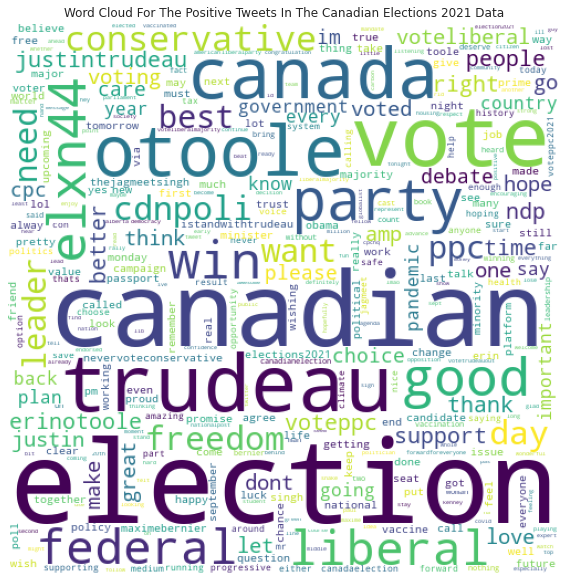

In [45]:
# Visualizing The Generated Word Cloud Figure For The Positive Tweets of The Canadian Elections 2021 Data  
plt.figure(figsize = (12, 8)) 
plt.imshow(word_cloud_Elec_Pos) 
plt.tight_layout(pad = 0)
plt.title("Word Cloud For The Positive Tweets In The Canadian Elections 2021 Data") 
plt.axis("off") 

(-0.5, 499.5, 499.5, -0.5)

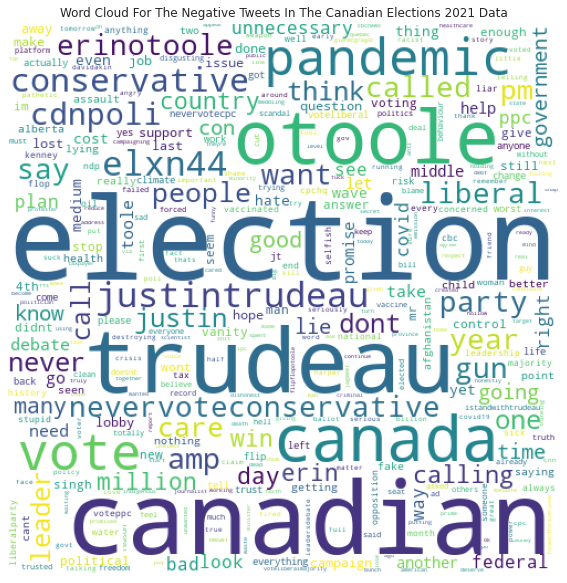

In [46]:
# Visualizing The Generated Word Cloud Figure For The Negative Tweets of The Canadian Elections 2021 Data  
plt.figure(figsize = (12, 8)) 
plt.imshow(word_cloud_Elec_Neg) 
plt.tight_layout(pad = 0)
plt.title("Word Cloud For The Negative Tweets In The Canadian Elections 2021 Data") 
plt.axis("off") 

In [47]:
# Making a DataFrames of just the "positive" sentiment of the Sentiment Analysis Data
Positive_SA_DF = SAnalysis_DF [SAnalysis_DF["label"] == 1]
Positive_SA_DF['tokenized_text'] = Positive_SA_DF.apply(lambda row: word_tokenize(row['text']), axis=1)

# Making a DataFrames of just the "negative" sentiment of the Sentiment Analysis Data
Negative_SA_DF = SAnalysis_DF [SAnalysis_DF["label"] == 0]
Negative_SA_DF['tokenized_text'] = Negative_SA_DF.apply(lambda row: word_tokenize(row['text']), axis=1)

In [48]:
# Creating the word cloud Figure for the Positive Tweets of the Sentiment Analysis Data 
word_cloud_SA_Pos = WordCloud (max_words=1000, background_color="white", min_font_size=5, collocations = False, 
                               max_font_size=100, width = 500, height = 500).generate(" ".join(Positive_SA_DF.tokenized_text.apply(lambda x: " ".join(x))))

# Creating the word cloud Figure for the Negative Tweets of the Sentiment Analysis Data 
word_cloud_SA_Neg = WordCloud (max_words=1000, background_color="white", min_font_size=5, collocations = False, 
                               max_font_size=100, width = 500, height = 500).generate(" ".join(Negative_SA_DF.tokenized_text.apply(lambda x: " ".join(x))))                      

(-0.5, 499.5, 499.5, -0.5)

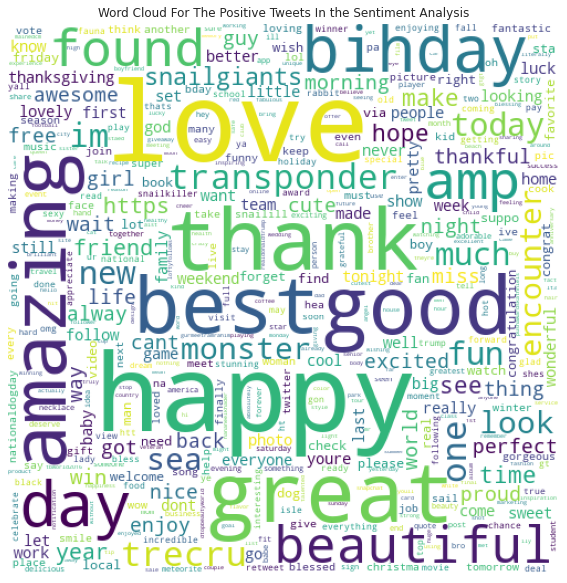

In [49]:
# Visualizing the generated word cloud figure for the Positive Tweets of the Sentiment Analysis Data 
plt.figure(figsize = (12, 8)) 
plt.imshow(word_cloud_SA_Pos) 
plt.tight_layout(pad = 0)
plt.title("Word Cloud For The Positive Tweets In the Sentiment Analysis") 
plt.axis("off") 

(-0.5, 499.5, 499.5, -0.5)

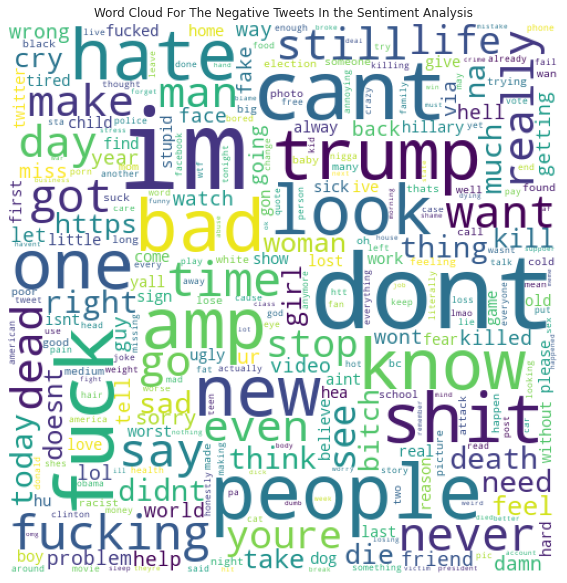

In [50]:
# Visualizing the generated word cloud figure for the negative Tweets of the Sentiment Analysis Data 
plt.figure(figsize = (12, 8)) 
plt.imshow(word_cloud_SA_Neg) 
plt.tight_layout(pad = 0)
plt.title("Word Cloud For The Negative Tweets In the Sentiment Analysis") 
plt.axis("off") 

### Discussing my findings

Regarding the 2021 Canadian Election tweets, we observe the following: 

  - In the word cloud of the positive sentiment tweets, we can see people are spreading positiveity, by spreading the news of the election and encouraging people to vote. The two major parties talked about are the Liberals and then the Conservatives. Two main politicians talked about is Justin Trudeau and Erin O'toole (This makes sense as the 2 major talked about parites were Liberal and conservatives).After the Libaral and Consevative parties we can see PPC and NDP also appear in the word cloud. 
  - In the word cloud of the negative sentiment tweets, again we can see people are mostly talking about Liberals, Justin Trudeau, Consevative, and Erin O'toole. 

From the above, we can conclude people have strong feelings (both positive and negative) towards the Liberal and Conservative parties. Each party can utilize the underlying tweet related to each of the keywords in the word cloud to understand why people have positive or negative emotion towards their respected party and better understand how to move forward to win more votes in the future election.


Regarding the generic tweets in sentiment analysis data, we observe the following: 

- In the word cloud of the positive sentiment tweets, we can see the most common words are happy, love, great, happy, good, best, thank, amazing, beautiful, and other postive words. We can see that most of the positive sentiment tweets have a loving undertune associated with it. 

- In the word cloud of the negative sentiment tweets, we can see the most common words are bad, hate, trump, never and alot of profanity words. 


### Step 3: Sentiment Classification - Model Implementation and Tuning 

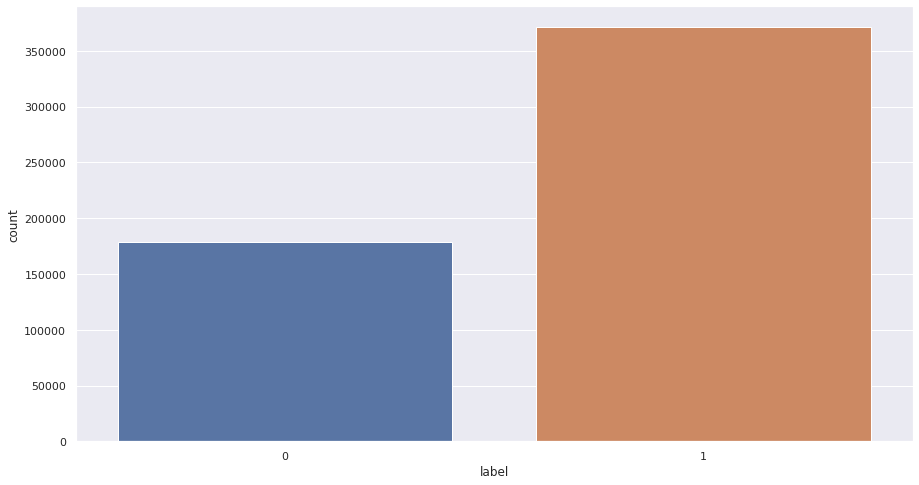

In [51]:
# Splitting the generic tweets randomly into training data (80%) and test data (20%).

# Visualizing the distribution of our Target Varible in the Train data
plt.figure(figsize = (15,8))
sns.countplot(x='label',data=SAnalysis_DF)

In [52]:
# Spliting the Dataframe to features (generic_X) and Target (generic_y)
generic_X = SAnalysis_DF["text"]
generic_y = SAnalysis_DF["label"]

In [53]:
# Splitting the data into Train and Test data 
X_train, X_test, y_train, y_test = train_test_split(generic_X, generic_y, test_size= 0.2, random_state=1624) 

In [54]:
# Preparing the data using TF-IDF.

# Importing relevant library 
from sklearn.feature_extraction.text import CountVectorizer

# Converting the text documents to a matrix of token counts
# setting the max_features = 5000 to keep the computation time manageable. 
Vectorizer_text = CountVectorizer(max_features = 5000, max_df=0.5)
# Fitting and transforming the train data
X_train_vec = Vectorizer_text.fit_transform(X_train)
# Transforming the test data
X_test_vec = Vectorizer_text.transform(X_test)


# Importing relevant library 
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_text = TfidfTransformer()
# Fitting and transforming the train data
X_train_vec_tfidf = tfidf_text.fit_transform(X_train_vec)
# Transforming the test data
X_test_vec_tfidf = tfidf_text.transform(X_test_vec)

### Step 3-1: Training seven classification algorithms on the training data from generic tweets: logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest, and XGBoost, where each tweet is considered a single observation/example, and the target variable is the sentiment value, which is either positive or negative.

MODEL 1: Logisitic Regression Model 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Finding the best parameters using Gridsearch 

# Defining logisitic regression parameters 
param_grid={"C":[0.001,0.01,0.1,1,5,10], "penalty":["l1","l2"], 
            'solver': ["newton-cg", "lbfgs", "liblinear", "sag"]}
# instantiating the logistic regression model 
log_reg_M1 = LogisticRegression(random_state=1614)

# Defing the GridSearch model 
log_reg_M1_cv = GridSearchCV(log_reg_M1, param_grid, cv=5)

# Fitting the train data on the above model
log_reg_M1_cv_best = log_reg_M1_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters and its corresponding score 
print ("The Optimal parameters for the Logistic Regression Model is:", 
       log_reg_M1_cv_best.best_params_)
print("")
print ("The Best Score for the Logistic Regression Model is:", 
       log_reg_M1_cv_best.best_score_)

The Optimal parameters for the Logistic Regression Model is: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}

The Best Score for the Logistic Regression Model is: 0.9653427556120177


In [56]:
# Initiating the optimal logistic regression model
Optimal_log_reg_M1 = LogisticRegression(C = 5, penalty = 'l1', solver = 'liblinear',
                                        random_state=1614)
# Fitting the train data on the optimal model
log_reg_M1_cv_best = Optimal_log_reg_M1.fit(X_train_vec_tfidf, y_train)

In [57]:
# Evaluating the logistic regression model on the train and test data 
from sklearn.metrics import accuracy_score

y_pred_train = log_reg_M1_cv_best.predict(X_train_vec_tfidf)
y_pred_test = log_reg_M1_cv_best.predict(X_test_vec_tfidf)

print ("Logisitc Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

Logisitc Model Accuracy Summary:
Accuracy for the Train Data: 96.9980%
Accuracy for the Test Data: 96.7278%


MODEL 2: KNN Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Finidng the parameters for the KNN model
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Creating a list of values for the hyper parameter K to be used in the girdsearch
k_range = (np.linspace(1, 20,20)).tolist() 

# Defining KNN parameters to be used in grid search
param_grid = {"n_neighbors": k_range, "weights": ["uniform", "distance"], 
              "metric": ["euclidean", "manhattan", "minkowski"]}

# Instantiating the KNN Model
KNN_M2 = KNeighborsClassifier()

# Defing the GridSearch model 
KNN_M2_cv = GridSearchCV(KNN_M2, param_grid, cv=5)

# Fitting the train data on the above model
KNN_M2_cv_best = KNN_M2_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters
print ("The Optimal parameters for the KNN Model is:", 
       KNN_M2_cv_best.best_params_)

The Optimal parameters for the KNN Model is: {'metric': 'euclidean', 'n_neighbors': 1.0, 'weights': 'uniform'}


In [60]:
# Initiating the optimal KNN model
Optimal_KNN_M2 = KNeighborsClassifier(n_neighbors = 1, weights = "uniform", 
                                          metric = "euclidean")
# Fitting the train data on the optimal model
KNN_M2_best = Optimal_KNN_M2.fit(X_train_vec_tfidf, y_train)

In [61]:
# Evaluating the KNN model on the train and test data 
y_pred_train = KNN_M2_best.predict(X_train_vec_tfidf)
y_pred_test = KNN_M2_best.predict(X_test_vec_tfidf)

print ("KNN Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

KNN Model Accuracy Summary:
Accuracy for the Train Data: 99.7306%
Accuracy for the Test Data: 83.1521%


MODEL 3: Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB

# Finidng the parameters for the Multinomial Naive Bayes model
Multi_NB = MultinomialNB()
Multi_NB.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [63]:
# Using Multinomial Naive Bayes as it is one of the two classic naive Bayes variants used
# in text classification. As mentioned by the official website "The multinomial Naive Bayes
# classifier is suitable for classification with discrete features (e.g., word counts for
# text classification)."

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

# Defining Multinomial Naive Bayes parameters to be used in grid search
param_grid = {'alpha': (10, 1, 0.1, 0.01, 0.001, 0.0001)}  

# Instantiating the Multinomial Naive Bayes Model
Multi_NB_M3 = MultinomialNB()

# Defing the GridSearch model 
Multi_NB_M3_cv = GridSearchCV(Multi_NB_M3, param_grid, cv=5)

# Fitting the train data on the above model
NB_M3_cv_best = Multi_NB_M3_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters and its corresponding score 
print ("The Optimal parameters for the Multinomial Naive Bayes Model is:", 
       NB_M3_cv_best.best_params_)
print("")
print ("The Best Score for the Multinomial Naive Bayes Model is:", 
       NB_M3_cv_best.best_score_)

The Optimal parameters for the Multinomial Naive Bayes Model is: {'alpha': 1}

The Best Score for the Multinomial Naive Bayes Model is: 0.9313009875097797


In [64]:
# Initiating the optimal Multinomial Naive Bayes model
Optimal_Multi_NB_M3 = MultinomialNB(alpha = 1)

# Fitting the train data on the optimal model
NB_M3_best = Optimal_Multi_NB_M3.fit(X_train_vec_tfidf, y_train)

In [65]:
# Evaluating the Multinomial Naive Bayes model on the train and test data 
y_pred_train = NB_M3_best.predict(X_train_vec_tfidf)
y_pred_test = NB_M3_best.predict(X_test_vec_tfidf)

print ("The Multinomial Naive Bayes Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The Multinomial Naive Bayes Model Accuracy Summary:
Accuracy for the Train Data: 93.2970%
Accuracy for the Test Data: 93.2140%


MODEL 4: SVM

In [66]:
from sklearn.svm import LinearSVC

# Instantiating the SVC Model
SVC_M4 = LinearSVC()

# Fitting the train data on the above model
SVC_M4_best = SVC_M4.fit(X_train_vec_tfidf, y_train)

In [67]:
from sklearn.metrics import accuracy_score
# Evaluating the SVC model on the train and test data 
y_pred_train = SVC_M4_best.predict(X_train_vec_tfidf)
y_pred_test = SVC_M4_best.predict(X_test_vec_tfidf)

print ("The SVC Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The SVC Model Accuracy Summary:
Accuracy for the Train Data: 96.9133%
Accuracy for the Test Data: 96.7078%


MODEL 5: Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Defining Decision Tree parameters to be used in grid search
param_grid = {"max_depth": [2,4,6,8,10], "max_leaf_nodes": [100,150,200], 
              "min_samples_leaf": [2,5,10], "criterion": ["gini", "entropy"]}

# Instantiating the Decision Tree Model
Tree_M5 = DecisionTreeClassifier(random_state=1624)

# Defing the GridSearch model 
Tree_M5_cv = GridSearchCV(Tree_M5, param_grid, cv=5)

# Fitting the train data on the above model
Tree_M5_cv_best = Tree_M5_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters and its corresponding score 
print ("The Optimal parameters for the Decision Tree Model is:", 
       Tree_M5_cv_best.best_params_)
print("")
print ("The Best Score for the Decision Tree Model is:", 
       Tree_M5_cv_best.best_score_)

The Optimal parameters for the Decision Tree Model is: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_leaf': 2}

The Best Score for the Decision Tree Model is: 0.7302844353460987


In [69]:
# Initiating the optimal Decision Tree model
Optimal_Tree_M5 = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 100, 
                                         min_samples_leaf =2,criterion = "gini",
                                         random_state=1624)

# Fitting the train data on the optimal model
Tree_M5_best = Optimal_Tree_M5.fit(X_train_vec_tfidf, y_train)

In [70]:
# Evaluating the Decision Tree model on the train and test data 
y_pred_train = Tree_M5_best.predict(X_train_vec_tfidf)
y_pred_test = Tree_M5_best.predict(X_test_vec_tfidf)

print ("The Decision Tree Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The Decision Tree Model Accuracy Summary:
Accuracy for the Train Data: 73.0773%
Accuracy for the Test Data: 72.9449%


MODEL 6: Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Defining Random Forest parameters to be used in grid search
param_grid = {"max_depth": [2,6,10],'n_estimators': [10, 20, 30], 
              'max_features': [2,4,8]}

# Initiating the Random Forest Model
RF_M6 = RandomForestClassifier(min_samples_leaf = 100, random_state=1624)

# Performing Gridsearch over the above defined parameters 
RF_M6_cv = GridSearchCV(RF_M6, param_grid, cv=5)

# Fitting the train data on the above model
RF_M6_cv_best = RF_M6_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters and its corresponding score 
print ("The Optimal parameters for the Random Forest Model is:", 
       RF_M6_cv_best.best_params_)
print("")
print ("The Best Score for the Random Forest Model is:", 
       RF_M6_cv_best.best_score_)

The Optimal parameters for the Random Forest Model is: {'max_depth': 10, 'max_features': 8, 'n_estimators': 10}

The Best Score for the Random Forest Model is: 0.6748805394347662


In [72]:
# Initiating the optimal Random Forest Model
Optimal_RF_M6 = RandomForestClassifier (min_samples_leaf = 100, max_depth = 10,
                                        n_estimators =10, max_features = 8, 
                                        random_state=1624)

# Fitting the train data on the optimal model
RF_M6_best = Optimal_RF_M6.fit(X_train_vec_tfidf, y_train)

In [73]:
# Evaluating the Random Forest Model on the train and test data 
y_pred_train = RF_M6_best.predict(X_train_vec_tfidf)
y_pred_test = RF_M6_best.predict(X_test_vec_tfidf)

print ("The Random Forest Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The Random Forest Model Accuracy Summary:
Accuracy for the Train Data: 67.4910%
Accuracy for the Test Data: 67.4834%


MODEL 7: XGBoost

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Initiating the XGB Model
XGB_M7 = GradientBoostingClassifier()

# Fitting the train data on the above model
XGB_M7_best = XGB_M7.fit(X_train_vec_tfidf, y_train)

In [75]:
# Evaluating the XGB Model on the train and test data 
y_pred_train = XGB_M7_best.predict(X_train_vec_tfidf)
y_pred_test = XGB_M7_best.predict(X_test_vec_tfidf)

print ("The XGB Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The XGB Model Accuracy Summary:
Accuracy for the Train Data: 81.1143%
Accuracy for the Test Data: 81.1563%


### Step 3-2: Implementing a Deep learning model

Split the generic tweets into training data (60%), validation data (20%) and test
data (20%).

In [76]:
# Splitting the data to dummy and test sets. The dummy set  will be further split into train and validation sets
X_dummy, X_test, y_dummy, y_test = train_test_split(generic_X, generic_y, test_size=0.20, random_state=1) 
# spliting the data to train and validation set                                                              
X_train, X_val, y_train, y_val = train_test_split(X_dummy, y_dummy, test_size=0.25, random_state=1) 

Preparing the data using Bag of Words (word frequency).

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
# Converting the text documents to a matrix of token counts (setting the max_features = 5000 to keep the computation time manageable.) 
Vectorizer_text_DL = CountVectorizer(max_features = 5000, max_df=0.5)

# Fitting and transforming the train data
X_train_vec_DL = Vectorizer_text_DL.fit_transform(X_train)
# Transforming the validation and test data
X_val_vec_DL = Vectorizer_text_DL.transform(X_val)
X_test_vec_DL = Vectorizer_text_DL.transform(X_test)

In [78]:
from sklearn.neural_network import MLPClassifier # Importing Library 
from sklearn.metrics import accuracy_score

def DL_Model (X_Train, y_Train, X_Val, y_Val):

  """ This function performs sentiment classification task using a deep learning model """

  # First: Defining the model
  DL_Model = MLPClassifier (solver='lbfgs', activation='relu', alpha=1e-5, hidden_layer_sizes=(10,8,4), random_state=1, max_iter=100)
  # Second: Fitting the training data
  DL_Model.fit(X_Train, y_Train)

  # Third: Finding the Accuracy for the train data  
  Train_Accuracy = DL_Model.score(X_Train, y_Train)

  # Forth: Finding the Accuracy for the test data  
  Val_Accuracy = DL_Model.score(X_Val, y_Val)

  return (Train_Accuracy, Val_Accuracy)

In [79]:
# Self-Check:
Train_Accuracy, Val_Accurarcy = DL_Model (X_train_vec_DL, y_train, X_val_vec_DL, y_val)
print(Train_Accuracy)
print(Val_Accurarcy)

0.9740305359230121
0.9664328930394811


Tuning two hyperparameters of the deep learning model using grid search.

In [80]:
# Keeping all the parameters the same as the above except "hidden_layer_sizes" and "alpha" (the two selected hyperparameters for tuning)

hidden_layer_sizes = [(3,3,3),(4,4,4),(5,5,5),(3,3,3,3), (4,4,4,4), (5,5,5,5)]
alpha = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]

Train_Accuracy_Master_List = []
Validation_Accuracy_Master_List = []

for i in alpha:
  for layers in hidden_layer_sizes: 

    DL_Model = MLPClassifier (solver='lbfgs', activation='relu', alpha = i, hidden_layer_sizes = layers,  random_state=1, max_iter=100)

    DL_Model.fit(X_train_vec_DL, y_train)

    Train_Accuracy = DL_Model.score(X_train_vec_DL, y_train)
    Val_Accuracy = DL_Model.score(X_val_vec_DL, y_val)

    Train_Accuracy_Master_List.append(Train_Accuracy)
    Validation_Accuracy_Master_List.append(Val_Accuracy)

In [81]:
# Finding the index of the maximum validation accuracy in Validation_Accuracy_Master_List
Idx_max_accuracy = np.argmax(Validation_Accuracy_Master_List)
Idx_max_accuracy

43

In [82]:
# Printing the maximum accuracy 
Validation_Accuracy_Master_List[43]

0.9662421192245498

In [83]:
# index 43 correponds to hyper parameters alpha = 0.1 and hidden_layer_sizes = (3,3,3)

In [85]:
# Finding the Train and Validation accuracy based on the best hyperparameters for the DL model
DL_Model = MLPClassifier (solver='lbfgs', activation='relu', alpha = 0.1, hidden_layer_sizes = (3,3,3),  random_state=1, max_iter=100)
DL_Model.fit(X_train_vec_DL, y_train)
print("Accuracy for the Train Data: {:.4f}%".format(DL_Model.score(X_train_vec_DL, y_train)*100))
print("Accuracy for the Test Data: {:.4f}%".format(DL_Model.score(X_test_vec_DL, y_test)*100))

Accuracy for the Train Data: 97.1063%
Accuracy for the Test Data: 96.4008%


### Step 3-3:  Evaluating the trained model with the best performance on the Canadian Elections data. 

In [86]:
# Printing the first 5 rows of the Canadian Elections Data
CElec_2021_DF.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,negative,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,negative,covid
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,positive,NaN
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxi...,positive,NaN


In [87]:
# Converting the sentiment column elements (positive & negative) to floats in order to provide this column to the best perfomed model
CElec_2021_DF.loc[CElec_2021_DF["sentiment"] == "negative", "sentiment"] = 0
CElec_2021_DF.loc[CElec_2021_DF["sentiment"] == "positive", "sentiment"] = 1

# Changing the data type to float
CElec_2021_DF["sentiment"] = pd.to_numeric(CElec_2021_DF["sentiment"], downcast="float")
CElec_2021_DF.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,covid
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,1.0,NaN
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,calling election early
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxi...,1.0,NaN


The Best Performance Model from the pervious parts is the LinearSVC model with a test accuracy of 96.7078%

In [88]:
# Slicing the DataFrame just for the Features and Targets 
Election_Data_X = CElec_2021_DF["text"]
Election_Data_y = CElec_2021_DF["sentiment"]

# Converting the Election Data using CountVectorizer and TfidfTransformer (The same method used in part 3a):
# Transforming the Election data to a matrix of token counts
Elec_data_vec = Vectorizer_text.transform(Election_Data_X)
# Transforming the Election data
Elec_data_vec_tfidf = tfidf_text.transform(Elec_data_vec)

# Finding the prediction of the model
y_pred = SVC_M4_best.predict(Elec_data_vec_tfidf)

print("Model Performance Summary:")
print("")

# Finding the model's accuracy 
print ("Accuracy for the Test Data:    {:.4f}%".format(accuracy_score(Election_Data_y, y_pred)*100))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Finding the model's Precision 
print ("Precision for the Test Data:   {:.4f}%".format(precision_score(Election_Data_y, y_pred)*100))
# Finding the model's Recall 
print ("Recall for the Test Data:      {:.4f}%".format(recall_score(Election_Data_y, y_pred)*100))
# Finding the model's F1 Score 
print ("F1 Score for the Test Data:    {:.4f}%".format(f1_score(Election_Data_y, y_pred)*100))
# Findinf the model's AUC
print ("AUC for the Test Data:         {:.4f}%".format(roc_auc_score(Election_Data_y, y_pred)*100))

Model Performance Summary:

Accuracy for the Test Data:    69.9601%
Precision for the Test Data:   89.0547%
Recall for the Test Data:      58.2114%
F1 Score for the Test Data:    70.4031%
AUC for the Test Data:         73.4209%


In [89]:
# Printing the classification report 
from sklearn.metrics import classification_report
print(classification_report(Election_Data_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.89      0.70       387
         1.0       0.89      0.58      0.70       615

    accuracy                           0.70      1002
   macro avg       0.73      0.73      0.70      1002
weighted avg       0.77      0.70      0.70      1002



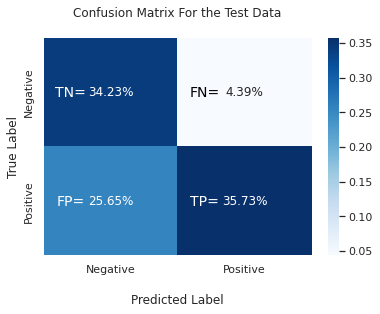

In [90]:
# Plotting the confusion matrix 
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
cf_matrix = confusion_matrix(Election_Data_y, y_pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix For the Test Data\n');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

# Inserting the Ticket Labels 
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

# Inputting TN FO FN TP Labels onto the confusion matrix
s = [['TN','FP'], ['FN', 'TP']]
thresh = 257
for i in range(2):
    for j in range(2):
        plt.text(i+0.2,j+0.54, str(s[i][j])+"=", fontsize = 14, horizontalalignment="center",
                 color="black" if (cf_matrix)[i, j] == thresh else "white")

# Displaying the Confusion Matrix.
plt.show()

### How well does the  predictions match the sentiment labelled in the Canadian elections data?

By inspecting the confusion matrix above, we can see the model has an accuracy of 69.96% (sum of the diagonal, 34.23% + 35.73%) which means the model assigns the correct sentiment to the Canadian election data with an accuracy of 69.96%.

A summary of the models performance based on all different perfomance metric can be seen below: 

- Accuracy for the Test Data:    69.9601%
- Precision for the Test Data:   89.0547%
- Recall for the Test Data:      58.2114%
- F1 Score for the Test Data:    70.4031%
- AUC for the Test Data:         73.4209%

### Presenting the following two other evaluation metrics that can be used to evaluate the models:

We can use Percision and or Recall to evaluate the model. 

**Percision** is a performance metric used to evaluate the performance of machine learning models (the quality of a positive prediction made by the model). Essentially precision is the number of true positives (tp) divided by total number of positive predictions (the sum of tp and false positive (fp)). The following the Percisions formula:

  - tp / (tp + fp)

What precision tells us is, how many tp predicted by the model is actually positive sentiment. 


From the above classification report (in part 3c) we can see, for positive sentiments (1) the model has a precision of 0.89 (89%) and for negative sentiments (0), the model has a percision of 0.57 (57%). 



**Recall** is another performance metric used to evaluate the performance of machine learning models. The Recall is the measures of our model correctly identifying tp. Thus, in the case of tweet sentiment, for all the tweets which actually were true positive, recall tells us how many we correctly identified as true positive. The following the Recall formula:


 - tp / (tp + fn)


From the above classification report (in part 3c) we can see, for positive sentiments (1) the model has a recall of 0.58  (58%) and for negative sentiments (0), the model has a recall of 0.89 (89%). 


### Choosing the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties.

In [91]:
# Making a DataFrame with the Party column
Party_DF = Election_OG_DF[["Party"]]    # Extracting the party column from the dataframe made in part 2
Elec_2021_Party_DF = pd.concat([CElec_2021_DF, Party_DF], axis=1) # adding the party column to clean canadian election dataframe
Elec_2021_Party_DF.head()

,text,sentiment,negative_reason,Party
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,calling election early,Lib
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,covid,Lib
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,1.0,NaN,No Party Affiliation
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,calling election early,Lib
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxi...,1.0,NaN,"PPC, NDP"


In [92]:
# Adding the prediction column to the DataFrame
Elec_2021_Party_DF["sentiment predicted"] = y_pred
Elec_2021_Party_DF.head()

,text,sentiment,negative_reason,Party,sentiment predicted
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,calling election early,Lib,0
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,covid,Lib,0
2,dear canadian election test progressive whether stand science woman ’ bipoc right equality publi...,1.0,NaN,No Party Affiliation,0
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,calling election early,Lib,0
4,sorry thejagmeetsingh voted ndp life election fighting freedom canadian voted last saturday maxi...,1.0,NaN,"PPC, NDP",0


In [93]:
# Creating a DataFrame for each party
Lib_DF = Elec_2021_Party_DF[Elec_2021_Party_DF["Party"] == "Lib"]
CPC_DF = Elec_2021_Party_DF[Elec_2021_Party_DF["Party"] == "CPC"]
NDP_DF = Elec_2021_Party_DF[Elec_2021_Party_DF["Party"] == "NDP"]
PPC_DF = Elec_2021_Party_DF[Elec_2021_Party_DF["Party"] == "PPC"]
# If the Party is combination of more than 1 party then that row will be assign to a category called "mix" (Tweets that have more then 1 party)
Mix_DF = Elec_2021_Party_DF[(Elec_2021_Party_DF["Party"] != "PPC") & (Elec_2021_Party_DF["Party"] != "NDP") & (Elec_2021_Party_DF["Party"] != "Lib") &
                            (Elec_2021_Party_DF["Party"] != "CPC") & (Elec_2021_Party_DF["Party"] != "No Party Affiliation")]
Mix_DF.loc[:,"Party"] = "Mix" 

# Combing all 5 dataframe into one master DataFrame 
Four_Party_DF = pd.concat([Lib_DF, CPC_DF, NDP_DF, PPC_DF, Mix_DF], axis=0)
print(Four_Party_DF["Party"].unique())

# Changing the 0 to negative and 1 to postive in the sentiment column, this is for better visualization of the data when I plot it in the following lines 
Four_Party_DF.loc[Four_Party_DF["sentiment"] == 0, "sentiment"] = "negative"
Four_Party_DF.loc[Four_Party_DF["sentiment"] == 1, "sentiment"] = "positive"

Four_Party_DF.loc[Four_Party_DF["sentiment predicted"] == 0, "sentiment predicted"] = "negative"
Four_Party_DF.loc[Four_Party_DF["sentiment predicted"] == 1, "sentiment predicted"] = "positive"

Four_Party_DF.head()

['Lib' 'CPC' 'NDP' 'PPC' 'Mix']


,text,sentiment,negative_reason,Party,sentiment predicted
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,negative,calling election early,Lib,negative
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,negative,covid,Lib,negative
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,negative,calling election early,Lib,negative
14,election kept canadian healthy alive canada going want canada liberal government proven protect ...,positive,NaN,Lib,positive
20,canadian election getting interesting look like justintrudeau screwed timing neck neck race unkn...,positive,NaN,Lib,negative


In [94]:
# Finding the count of The actual positve and negative sentiment tweets for each party + the mix category. This is done to plot the bar plot in the 
# following lines of code

True_Neg_Lib = Four_Party_DF[(Four_Party_DF["Party"] == "Lib") & (Four_Party_DF["sentiment"] == "negative")][["Party"]].shape[0]
True_Pos_Lib = Four_Party_DF[(Four_Party_DF["Party"] == "Lib") & (Four_Party_DF["sentiment"] == "positive")][["Party"]].shape[0]

True_Neg_CPC = Four_Party_DF[(Four_Party_DF["Party"] == "CPC") & (Four_Party_DF["sentiment"] == "negative")][["Party"]].shape[0]
True_Pos_CPC = Four_Party_DF[(Four_Party_DF["Party"] == "CPC") & (Four_Party_DF["sentiment"] == "positive")][["Party"]].shape[0]

True_Neg_NDP = Four_Party_DF[(Four_Party_DF["Party"] == "NDP") & (Four_Party_DF["sentiment"] == "negative")][["Party"]].shape[0]
True_Pos_NDP = Four_Party_DF[(Four_Party_DF["Party"] == "NDP") & (Four_Party_DF["sentiment"] == "positive")][["Party"]].shape[0]

True_Neg_PPC = Four_Party_DF[(Four_Party_DF["Party"] == "PPC") & (Four_Party_DF["sentiment"] == "negative")][["Party"]].shape[0]
True_Pos_PPC = Four_Party_DF[(Four_Party_DF["Party"] == "PPC") & (Four_Party_DF["sentiment"] == "positive")][["Party"]].shape[0]

True_Neg_Mix = Four_Party_DF[(Four_Party_DF["Party"] == "Mix") & (Four_Party_DF["sentiment"] == "negative")][["Party"]].shape[0]
True_Pos_Mix = Four_Party_DF[(Four_Party_DF["Party"] == "Mix") & (Four_Party_DF["sentiment"] == "positive")][["Party"]].shape[0]

# Finding the count of The predicted positve and negative sentiment tweets for each party + the mix category 

Pred_Neg_Lib = Four_Party_DF[(Four_Party_DF["Party"] == "Lib") & (Four_Party_DF["sentiment predicted"] == "negative")][["Party"]].shape[0]
Pred_Pos_Lib = Four_Party_DF[(Four_Party_DF["Party"] == "Lib") & (Four_Party_DF["sentiment predicted"] == "positive")][["Party"]].shape[0]

Pred_Neg_CPC = Four_Party_DF[(Four_Party_DF["Party"] == "CPC") & (Four_Party_DF["sentiment predicted"] == "negative")][["Party"]].shape[0]
Pred_Pos_CPC = Four_Party_DF[(Four_Party_DF["Party"] == "CPC") & (Four_Party_DF["sentiment predicted"] == "positive")][["Party"]].shape[0]

Pred_Neg_NDP = Four_Party_DF[(Four_Party_DF["Party"] == "NDP") & (Four_Party_DF["sentiment predicted"] == "negative")][["Party"]].shape[0]
Pred_Pos_NDP = Four_Party_DF[(Four_Party_DF["Party"] == "NDP") & (Four_Party_DF["sentiment predicted"] == "positive")][["Party"]].shape[0]

Pred_Neg_PPC = Four_Party_DF[(Four_Party_DF["Party"] == "PPC") & (Four_Party_DF["sentiment predicted"] == "negative")][["Party"]].shape[0]
Pred_Pos_PPC = Four_Party_DF[(Four_Party_DF["Party"] == "PPC") & (Four_Party_DF["sentiment predicted"] == "positive")][["Party"]].shape[0]

Pred_Neg_Mix = Four_Party_DF[(Four_Party_DF["Party"] == "Mix") & (Four_Party_DF["sentiment predicted"] == "negative")][["Party"]].shape[0]
Pred_Pos_Mix = Four_Party_DF[(Four_Party_DF["Party"] == "Mix") & (Four_Party_DF["sentiment predicted"] == "positive")][["Party"]].shape[0]

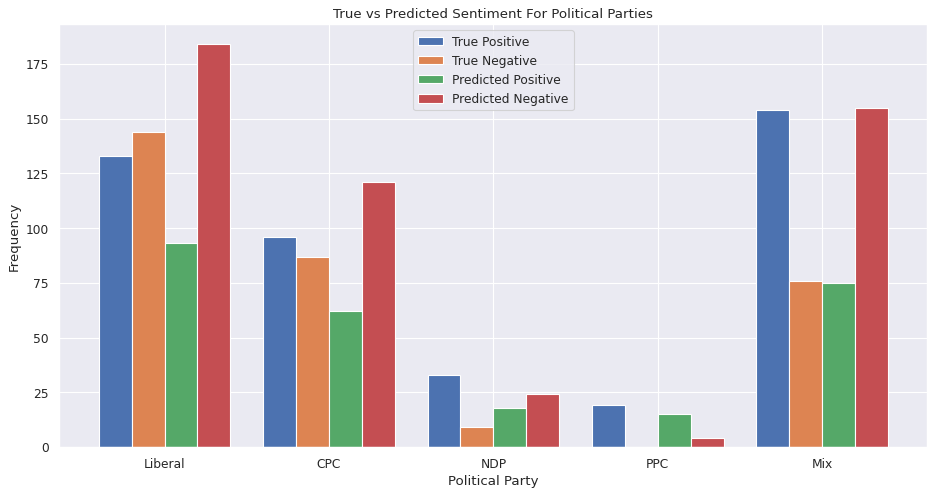

In [95]:
# Visualizing the sentiment prediction results and the true sentiment for the 4 parties through a bar graph. 

from matplotlib.pyplot import figure

# Changing the Figure size
figure(figsize=(14, 7), dpi=80)

# Plotting the bar plots for the True positive and negative sentiments 
N = 5
True_Pos_senti = (True_Pos_Lib, True_Pos_CPC, True_Pos_NDP, True_Pos_PPC, True_Pos_Mix)
True_Neg_senti = (True_Neg_Lib, True_Neg_CPC, True_Neg_NDP, True_Neg_PPC, True_Neg_Mix)

ind = np.arange(N) 
width = 0.2      
plt.bar(ind, True_Pos_senti, width, label='True Positive')
plt.bar(ind + width, True_Neg_senti, width, label='True Negative')

# Plotting the bar plots for the predicted positive and negative sentiments 
Pred_Pos_senti = (Pred_Pos_Lib, Pred_Pos_CPC, Pred_Pos_NDP, Pred_Pos_PPC, Pred_Pos_Mix)
Pred_Neg_senti = (Pred_Neg_Lib, Pred_Neg_CPC, Pred_Neg_NDP, Pred_Neg_PPC, Pred_Neg_Mix)

plt.bar(ind + width + width, Pred_Pos_senti, width, label='Predicted Positive')
plt.bar(ind + (3*width), Pred_Neg_senti, width, label='Predicted Negative')

# Labeling the x-axis, y-axis and the title 
plt.ylabel('Frequency')
plt.xlabel('Political Party')
plt.title('True vs Predicted Sentiment For Political Parties')

plt.xticks(ind + (width*1.5), ('Liberal', 'CPC', 'NDP', 'PPC', 'Mix'))
plt.legend(loc='best')
plt.show()

### Answering Key Questions

### **From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns.**

The model above has 70% accuracy. When considering the 4 partie, most of the tweets were regarding the Liberal party followed by the Conservatives then the New Democratic Party and finally People's Party of Canada. This makes sense and follows our findings in part 2 of this assignment. In part 2, I explain further why it makes intuitive sense Liberal and Conservatives having the most amount of tweets followed by NDP and PPC. 

By observing the bar plot above we can see that the model consistenly predicts more negative results than positve results for all 4 party as well as the mix category. This means the model is overpredicting the negative tweets for all 4 parties and underpredicting the positive tweets for all 4 parties. 

NLP analytics would be useful for political parties during election campaigns because each party can assest what they are doing correctly (based on positive sentiment of the tweets) and put a greater emphasis on policies and issues people seem to be responding positively too. More importantly, they can see in which areas they are losing voters (based on negative sentiment of the tweets) and try to either better explain their initial position or shift gears to a different policy in hopes in winning the general public votes.

In general NLP analytics is not a ground truth of the results of the campaign but it can be used to better understand the general publics unfilter thoughts in order to strenghten ones position in the Canadian 2021 election. 

Our model has an accuracy of 70% and therefore would be useful for political parties. However, I would aim to study the model once again and try to improve the accuracy as it would prove to be much more useful. This way the parties can be much more confident if they want to continue promoting an idea or chaning a policy.  

Note, in order not to get bias results, during the data gathering phase, it is vital to gather the data randomly and also to ensure the tweets that were gathered were not written by the actaul 2021 Canadian election candidates or their respected parties as this will create a bias in our result

*****

### **Explain how each party is viewed in the public eye based on the sentiment value.**

Liberal, if we look at the True sentiment labels, are viewed niether highly positive or negative in the public opinion as the negative tweets are just slightly more then the positive tweets. If we look at the predicted sentiments we can see, liberals are viewed negatively as the amount of negative tweets are approximatly double the positive tweets. 

Conservatives, if we look at the True sentiment labels, are viewed niether highly positive or negative in the public opinion as the positive tweets are just slightly more then the negative tweets. If we look at the predicted sentiments we can see, Conservatives are viewed negatively as the amount of negative tweets are more than the positive tweets. 

NDP and PPC are viewed positively when looking at the true sentiment labels, but negatively when looking at the predicted sentiment labels. However, it should be noted that the number of positive and negative tweets regarding these two parties are much lower than the Liberal and Conservative Party. 

In general, we can conclude that the Liberal and Conservative Parties are the most popular parties among the people in Canada followed by NDP and PPC. 

*****

### **Suggest one way you can improve the accuracy of this model.**

Use different techniques aside from TF-IDF to for text classification in the data. Since TF-IDF is based on bag of words model, it isnt able to capture semanatics and position in the text. TF-IDF also doesnt account for the relationship between words in the same row of data (tweet). We can experiment with two different strategies using 1- Word Embedding (with Word2Vec) and 2-  cutting edge Language models (with BERT). These two different techniques may improve the accuracy of the model. 

We also use Long short-term memory (LSTM) from the RNN architecture used in deep learning. LSTM is very good on remembering certain patterns of the text document and therefore performance is much better than conventional NLP methods. By having multiple hidden layers in the LSTM model, relevant information is kept and not useful information is discarded as the data pass throughs it.

We can also collect more tweets in order to have a bigger dataset to improve the training and therefore the predition of the model.

### Additional
### Part 4: Negative Reason Classification - Model implementation and tuning

In [96]:
# Slicing the DataFrame for only negative sentiment tweets ("0")
CElec_2021_DF_Neg = CElec_2021_DF[CElec_2021_DF["sentiment"]==0]
CElec_2021_DF_Neg.head() # Printing the first 5 rows 

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,calling election early
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,covid
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,calling election early
5,vaccine amp gun key election otoole serious plan get canadian vaccinated cant even get candidate...,0.0,covid
6,’ sorry moderator respond leadership candidate ’ debate farce frankly disservice canadian awful ...,0.0,others


In [97]:
# Finding all the uniques values in the Negative Reason column 
CElec_2021_DF_Neg["negative_reason"].unique()

array(['calling election early', 'covid ', 'others', 'scandal',
       'tell lies', 'gun control', 'economy', 'healthcare and marijuana',
       'segregation', 'women reproductive right and racism',
       'climate problem'], dtype=object)

In [98]:
# Finding the number of uniques enteris in the Negative Reason column 
CElec_2021_DF_Neg["negative_reason"].nunique()

11

Text(0.5, 1.0, 'Bar Plot of Negative Reasons for Tweets')

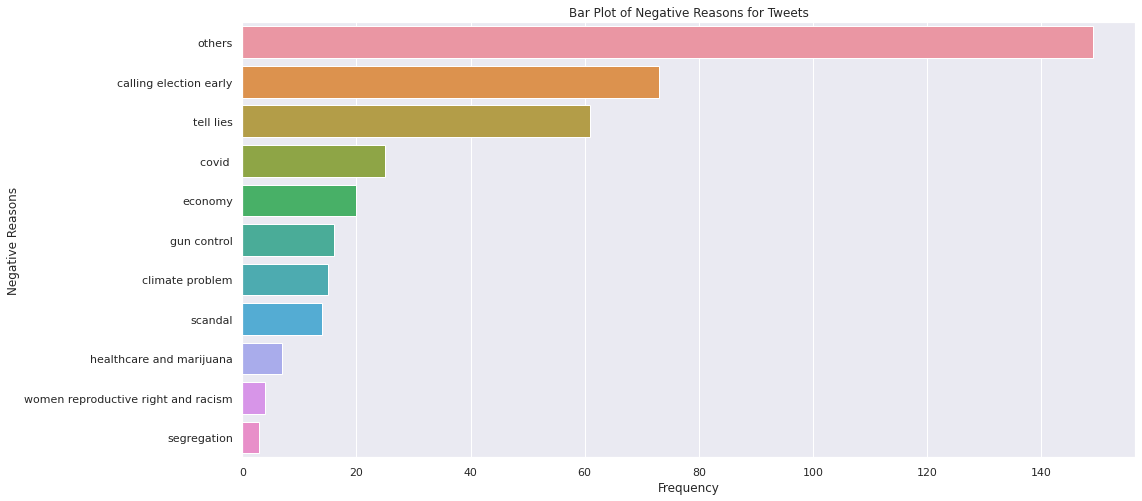

In [99]:
# Bar plot: Showing the frequency of each of the negative reasons
CElec_2021_DF_Neg_sort = CElec_2021_DF_Neg.groupby(['negative_reason'])['negative_reason'].count().reset_index(name='Frequency').sort_values(['Frequency'], 
                                                                                                                                             ascending=False)
f, ax = plt.subplots(figsize=(16,8)) 
sns.barplot(x="Frequency", y="negative_reason", data=CElec_2021_DF_Neg_sort)
plt.ylabel('Negative Reasons')
plt.title('Bar Plot of Negative Reasons for Tweets')

In [100]:
# Finding the distribution of each negative reason 
CElec_2021_DF_Neg['negative_reason'].value_counts(normalize=True)

others                                 0.385013
calling election early                 0.188630
tell lies                              0.157623
covid                                  0.064599
economy                                0.051680
gun control                            0.041344
climate problem                        0.038760
scandal                                0.036176
healthcare and marijuana               0.018088
women reproductive right and racism    0.010336
segregation                            0.007752
Name: negative_reason, dtype: float64

In [101]:
# Since there isnt much of "Segregation" inputs (less than 1%), I will add all of them to others, as is makes for better model development
CElec_2021_DF_Neg['negative_reason'].replace({"segregation": "others"}, inplace=True)

##### In order to be able to provide the negative_reason column, we must first convert the categorical variables to numerical variables

##### To work with machine learning models we need to convert all categorical variables to numerical values and so if we have categorical variables we need to encode them.


In [102]:
# Label encoding the negative reason elements 
CElec_2021_DF_Neg['negative_reason'].replace({"others": 0, "calling election early": 1, "tell lies": 2, "covid ":3, "economy":4, "gun control":5, 
                                              "climate problem":6, "scandal":7, "healthcare and marijuana":8, "women reproductive right and racism":9}, 
                                             inplace=True)

CElec_2021_DF_Neg.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,1
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,3
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,1
5,vaccine amp gun key election otoole serious plan get canadian vaccinated cant even get candidate...,0.0,3
6,’ sorry moderator respond leadership candidate ’ debate farce frankly disservice canadian awful ...,0.0,0


In [103]:
# Spliting the Dataframe to Features and Target 
Features = CElec_2021_DF_Neg["text"]
Target = CElec_2021_DF_Neg ["negative_reason"]

# Splitting the data into Train and Test data 
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size= 0.3, random_state=1624)

In [104]:
# Finding the amount of observations (rows) we have in the train and test data 
print("Amount of observations in the train data:", X_train.shape[0])
print("Amount of observations in the test data:", X_test.shape[0])

Amount of observations in the train data: 270
Amount of observations in the test data: 117


In [105]:
# Converting the Election Data using CountVectorizer and TfidfTransformer (The same method used in part 3a):
# Transforming the Election data to a matrix of token counts

Vectorizer_text = CountVectorizer(max_features = 5000)

X_train_vec = Vectorizer_text.fit_transform(X_train)
X_test_vec = Vectorizer_text.transform(X_test)

# Transforming the Election data
tfidf_text = TfidfTransformer()

X_train_vec_tfidf = tfidf_text.fit_transform(X_train_vec)
X_test_vec_tfidf = tfidf_text.transform(X_test_vec)

In [106]:
# Im choosing the LinearSVC model as its the Best Performance Model from part a & b with a test accuracy of 96.7078%
from sklearn.model_selection import GridSearchCV

# Instantiating the SVC Model
SVC = LinearSVC(random_state = 1624)

# Defining SVC parameters to be used in grid search
param_grid = {"penalty": ["l1", "l2"], "loss": ["hinge", "squared_hinge"], "C": [0.001,0.001,0.1,0.5,0.9,1],
              "multi_class":["ovr", "crammer_singer"], "class_weight": ["dict", "balanced"], "max_iter":[10,50,100]}

SVC_cv = GridSearchCV(SVC, param_grid, cv=5)
# Fitting the train data to the above model
SVC_cv.fit(X_train_vec_tfidf, y_train)

# Finding the optimal parameters and its corresponding score 
print ("The Optimal parameters for the Random Forest Model is:", SVC_cv.best_params_)

The Optimal parameters for the Random Forest Model is: {'C': 0.1, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 10, 'multi_class': 'ovr', 'penalty': 'l2'}


In [107]:
# SVC Model with the best hyperparameters from gridsearch
SVC = LinearSVC(C=0.1, class_weight="balanced", loss = "squared_hinge", max_iter=10, multi_class="ovr", penalty="l2", random_state = 1624)
SVC_best = SVC.fit(X_train_vec_tfidf, y_train)

In [108]:
# Evaluating the SVC model on the train and test data 
y_pred_train = SVC_best.predict(X_train_vec_tfidf)
y_pred_test = SVC_best.predict(X_test_vec_tfidf)

print ("The SVC Model Accuracy Summary:")
print ("Accuracy for the Train Data: {:.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print ("Accuracy for the Test Data: {:.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

The SVC Model Accuracy Summary:
Accuracy for the Train Data: 98.8889%
Accuracy for the Test Data: 58.1197%


In [109]:
# Self Check: Seeing the Distribution of the models prediction 
Neg_reason, Count_Neg_Reason = np.unique(y_pred_test, return_counts= True)
print("Unique Negative Reason:         ",          Neg_reason)
print("Count of Unique Negative Reason:", Count_Neg_Reason)

Unique Negative Reason:          [0 1 2 3 4 5 6 8]
Count of Unique Negative Reason: [62 29  8  3  1 10  3  1]


In [110]:
# Creating a DataFrame of the predicted negative reason with its counts 
data = {"others":[62],"calling election early":[29],"tell lies":[8],"covid":[3],"economy":[1],"gun control":[10],"climate problem":[3], 
        "healthcare and marijuana":[1]}

Neg_Reaon_DF = pd.DataFrame.from_dict(data).T.reset_index(level=0)
Neg_Reaon_DF.rename(columns = {'index':'Negative Reason', 0:'Prediction Count'}, inplace = True)
Neg_Reaon_DF

,Negative Reason,Prediction Count
0,others,62
1,calling election early,29
2,tell lies,8
3,covid,3
4,economy,1
5,gun control,10
6,climate problem,3
7,healthcare and marijuana,1


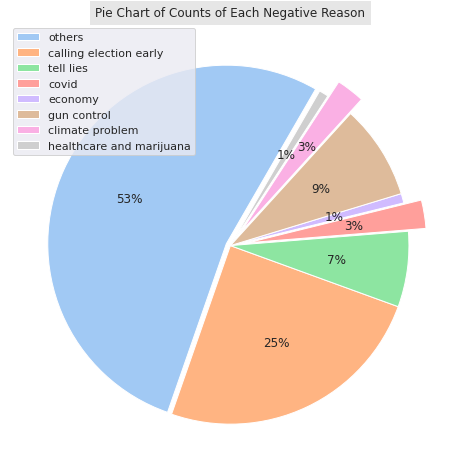

In [111]:
# Plotting a Pie Chart to see the distribution of the predicted negative results and to see the class imbalance  
# Setting the piechart color scheme
colors = sns.color_palette('pastel')[0:8]
# Exploding pie chart slices 
explode = (0.025, 0.0, 0, 0.1, 0, 0, 0.1, 0) 

labels = Neg_Reaon_DF["Negative Reason"].tolist()
sizes = Neg_Reaon_DF["Prediction Count"].tolist()

fig = plt.gcf()
fig.set_size_inches(8,16)

patches, texts, perc = plt.pie(sizes, colors=colors, startangle=60,autopct='%1.f%%', explode=explode)

plt.legend(patches, labels, loc="best")

plt.title("Pie Chart of Counts of Each Negative Reason", bbox={'facecolor':'0.9', 'pad':6})
plt.show()

**a) Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.**

**c) Feel free to combine similar reasons into fewer categories as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.**

Answer for part a and c are below:

The model has a high accuracy for the train data but a low accuracy for the test data. Therefore, the model is overfitting the data. This means our model has a low bias and high variance. The model fail to correctly learn the underlying pattern and ignore the noise in the dataset. Therefore we can do the following: 

  - Provide a larger dataset for the model to learn from and to be tested on. Currently the dataset is very small with only 270 observations for the model to be trained on and only 117 observations to be tested. Increasing the size of the dataset will enable our model to better learn the underlying phenomenon.

  - There are 11 different targets which are imbalanced. Since the targets are soo many, having sufficient amount of data is vital. Since the original data is imbalance, our predicted value will be bias towards the majority case ("others", "calling election early") and will over shadaow the minortiy cases ('tell lies', 'covid', 'economy', 'gun control', 'climate problem', 'healthcare and marijuana'). From the Bar plot above, we can see that the model is imbalance with the majority of the negative reasons being "others". This is why our model mostly predicted "others" (as seen in the pie chart above) and was not able to learn from the minority cases to predict them (many minority classes were completely ignored by the model). Balancing the data will help improve the models accuracy since it will ensure all the targets have a even playing field for the model to learn from. One technique that can be used is Up sampling. Up Sampling is useful because one can oversample the minority class to achieve a balanced dataset with the majority class. Another method is SMOTE. Smote is an over-sampling method that creates synthetic samples of the minority classes.

Also we can group similar reasons into fewer categories. For example, the negative reasons tell lies and scandal can all be grouped in one category called misinformation. Both "telling lies" and "scandal" are used to deceive the general public in believing something that is not true and hence spreading misinformation. In addition, negative reasons "segragation" and "women reproductive right and racism" can be grouped in one category as well. Both racism and segragation is used to treat people of different race poorly and therefore these two reasons can be put in one category. We could be more aggresive and place negative reason "covid" and "economy" in one category as covid had a direct hit on Canada's economy. By reducing the amount of classes in the dataset, we reduced the amount of data needed to train the model exponentially. Also by having less classes in the dataset the underlying pattern will not be as complix and therefore our model can learn the underlying pattern much better and increase the test accuracy. 

Another possible reason the model fail to predict the correct negative reasons is because the words with the top TF-IDF score in the negative sentiment tweets are common for the different negative reasons. For Example, if we look at the bar plot for the top 10 words for the top 4 negative reasons (1-other, 2-calling election early, 3-gun control, 4- tell lies), we can see there is alot of common words among the different negative classes (This is shown through 3 different bar plots below in the supplementary code for part 4 a & c). Since there is alot of common words with a high TF-IDF score between the different classes, the model will be confused and not learn properly which keywords are related to which negative reason and hence, provide incorrect predictions. The solution here is to have more aggresive stop word removal to remove more commonly used words across the documents. Stem the words in the documents and have better lemmatization techniques. By doing so, the common words between the negative reasons shrink and therefore the model will be better able to predict the right class for the negative reason and have a higher accuracy. 

We can also perform a word frequency analysis on the entire negative Canadian elections tweets and only use words the have a TF-IDF score above a certain threshold. This way we provide the model with the most important and relevant keywords for it to learn from and better provide predictions with a higher accuracy.

**b) Suggest one way you can improve the accuracy of your selected model.**

One way to improve the model accuracy is to have a bigger dataset so the model can learn the underlying phenomenon better. If including more data points is not an option, the amount of classes can be reduced (grouping similar classes with one another as explained above) to better match the size of the data set.

We can also use a different model; for example we can use a LSTM model from the RNN architecture, used in deep learning.

Alternative solutions are explained in part a and c.

### Additional Codes for PART 4 a & c

Creating Bar Plots for the TOP 4 negative reasons in the negative Canadian elections tweets DataFrame to show how some words with high TF-IDF scores are common among the different negative reasons.

In [112]:
# Printing the first 5 rows of the the negative Canadian elections tweets DataFrame
CElec_2021_DF_Neg.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,1
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,3
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,1
5,vaccine amp gun key election otoole serious plan get canadian vaccinated cant even get candidate...,0.0,3
6,’ sorry moderator respond leadership candidate ’ debate farce frankly disservice canadian awful ...,0.0,0


In [113]:
# Creating 4 separate DataFrames for the top 4 negative reasons which corresponds too (order from highest to lowest): 1- "other"(0) 2- calling election early	(1)
# 3- gun control (5)	4- tell lies (6) (Refer to Pie chart above for visualization)

DF_others = CElec_2021_DF_Neg[CElec_2021_DF_Neg["negative_reason"] == 0]
DF_call_elec_early = CElec_2021_DF_Neg[CElec_2021_DF_Neg["negative_reason"] == 1]
DF_gun_control = CElec_2021_DF_Neg[CElec_2021_DF_Neg["negative_reason"] == 5]
DF_tell_lies = CElec_2021_DF_Neg[CElec_2021_DF_Neg["negative_reason"] == 6]

In [114]:
# Importing TfidfVectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initiating TF IDF vectorizer to convert raw documents to a matrix of TF-IDF feature 
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
vectorizer3 = TfidfVectorizer()
vectorizer4 = TfidfVectorizer()

# Fitting the data for the top 4 negative reasons: 
N1 = vectorizer1.fit_transform(DF_others["text"]) # Fitting data for negative reason corresponding to "other"(0)
N2 = vectorizer2.fit_transform(DF_call_elec_early["text"]) # Fitting data for negative reason corresponding to "calling election early"(1)
N3 = vectorizer3.fit_transform(DF_gun_control["text"]) # Fitting data for negative reason corresponding to "gun control"(5)
N4 = vectorizer4.fit_transform(DF_tell_lies["text"]) # Fitting data for negative reason corresponding to "tell lies"(6)

In [115]:
# Summing along axis 0 (vertical axis) to get the total TF-IDF score for each word in the Entire DataFrame
N1 = np.sum(N1.toarray(),axis=0).tolist()
N2 = np.sum(N2.toarray(),axis=0).tolist()
N3 = np.sum(N3.toarray(),axis=0).tolist()
N4 = np.sum(N4.toarray(),axis=0).tolist()

In [116]:
# Putting the TF-IDF score for each word in a DataFrame

Dictionary_1 = dict(zip(vectorizer1.get_feature_names(), N1))                       # Creating the dictinary for the DataFrame
DF_1 = pd.DataFrame.from_dict(Dictionary_1, orient='index').reset_index(level=0)    # Making the DataFrame
DF_1.rename(columns = {'index':'Word', 0:'TF-IDF Score'}, inplace = True)           # Changing the DataFrame Column names 
DF_1 = DF_1.sort_values('TF-IDF Score', ascending = False).reset_index().drop(columns = ["index"])
##-------------------------------------------------------------------------------------------------------------------------------------##
Dictionary_2 = dict(zip(vectorizer2.get_feature_names(), N2))                       # Creating the dictinary for the DataFrame
DF_2 = pd.DataFrame.from_dict(Dictionary_2, orient='index').reset_index(level=0)    # Making the DataFrame
DF_2.rename(columns = {'index':'Word', 0:'TF-IDF Score'}, inplace = True)           # Changing the DataFrame Column names 
DF_2 = DF_2.sort_values('TF-IDF Score', ascending = False).reset_index().drop(columns = ["index"])
##-------------------------------------------------------------------------------------------------------------------------------------##
Dictionary_3 = dict(zip(vectorizer3.get_feature_names(), N3))                       # Creating the dictinary for the DataFrame
DF_3 = pd.DataFrame.from_dict(Dictionary_3, orient='index').reset_index(level=0)    # Making the DataFrame
DF_3.rename(columns = {'index':'Word', 0:'TF-IDF Score'}, inplace = True)           # Changing the DataFrame Column names 
DF_3 = DF_3.sort_values('TF-IDF Score', ascending = False).reset_index().drop(columns = ["index"])
##-------------------------------------------------------------------------------------------------------------------------------------##
Dictionary_4 = dict(zip(vectorizer4.get_feature_names(), N4))                       # Creating the dictinary for the DataFrame
DF_4 = pd.DataFrame.from_dict(Dictionary_4, orient='index').reset_index(level=0)    # Making the DataFrame
DF_4.rename(columns = {'index':'Word', 0:'TF-IDF Score'}, inplace = True)           # Changing the DataFrame Column names 
DF_4 = DF_4.sort_values('TF-IDF Score', ascending = False).reset_index().drop(columns = ["index"])

In [117]:
# printing the shape of each DataFrame

print("DF_1 (TF-IDF score for negative reason'other') Shape is:                 ", DF_1.shape)
print("DF_2 (TF-IDF score for negative reason'calling election early') Shape is:", DF_2.shape)
print("DF_3 (TF-IDF score for negative reason'gun control') Shape is:           ", DF_3.shape)
print("DF_4 (TF-IDF score for negative reason'tell lies') Shape is:             ", DF_4.shape)

DF_1 (TF-IDF score for negative reason'other') Shape is:                  (1277, 2)
DF_2 (TF-IDF score for negative reason'calling election early') Shape is: (616, 2)
DF_3 (TF-IDF score for negative reason'gun control') Shape is:            (196, 2)
DF_4 (TF-IDF score for negative reason'tell lies') Shape is:              (177, 2)


In [118]:
# Joining the DataFrames based on the common words in each DataFrame (we use inner join since we only care about the common words)
# Slicing the DataFrame for only the top 10 highest TF-IDF Score words 

IJ_DF12 = pd.merge(DF_1, DF_2, on='Word', how='inner').iloc[:10,:] # Inner Joining DataFrame 1 and 2
IJ_DF13 = pd.merge(DF_1, DF_3, on='Word', how='inner').iloc[:10,:] # Inner Joining DataFrame 1 and 3
IJ_DF14 = pd.merge(DF_1, DF_4, on='Word', how='inner').iloc[:10,:] # Inner Joining DataFrame 1 and 4

# Changing Column names of the DataFrames 

IJ_DF12.rename(columns = {'TF-IDF Score_x':'TF-IDF Score for Negative Reason others', "TF-IDF Score_y":'TF-IDF Score for Negative Reason calling election early'}, inplace = True) 
IJ_DF13.rename(columns = {'TF-IDF Score_x':'TF-IDF Score for Negative Reason others', "TF-IDF Score_y":'TF-IDF Score for Negative Reason gun control'}, inplace = True) 
IJ_DF14.rename(columns = {'TF-IDF Score_x':'TF-IDF Score for Negative Reason others', "TF-IDF Score_y":'TF-IDF Score for Negative Reason tell lies'}, inplace = True) 

Text(0, 0.5, 'TF-IDF Score')

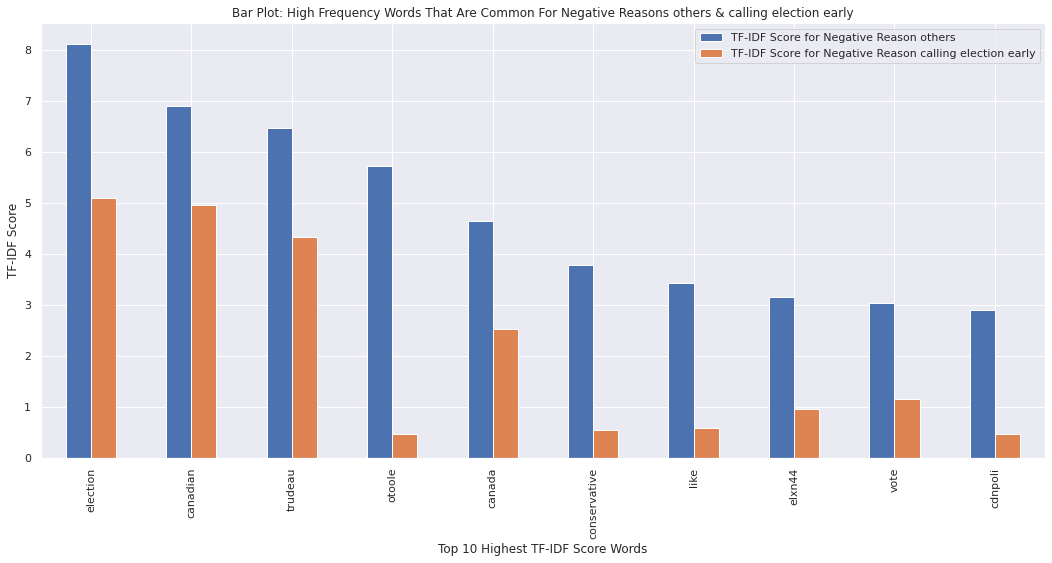

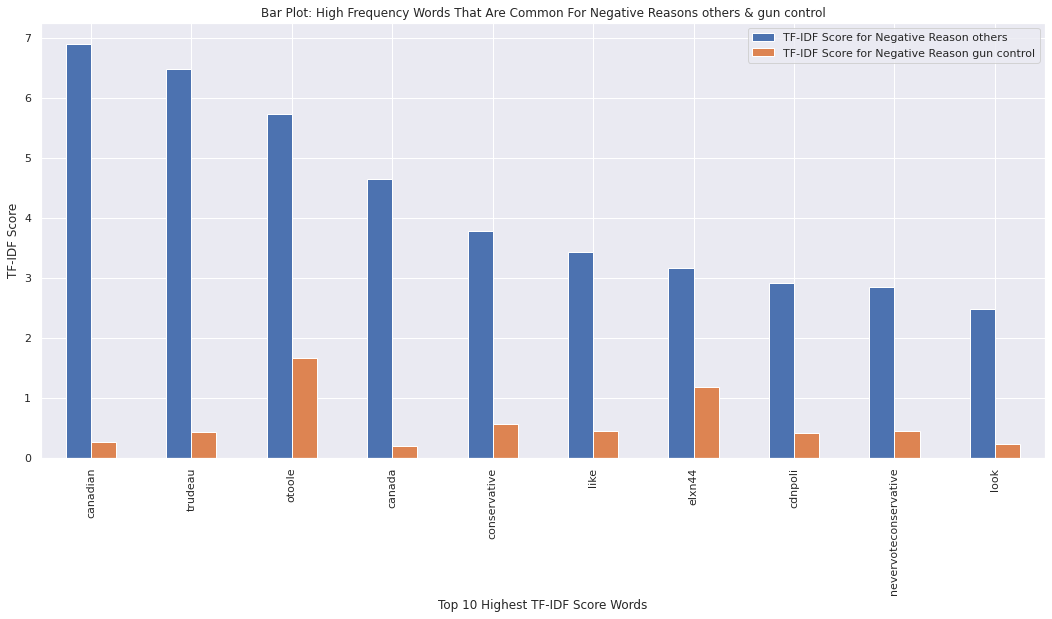

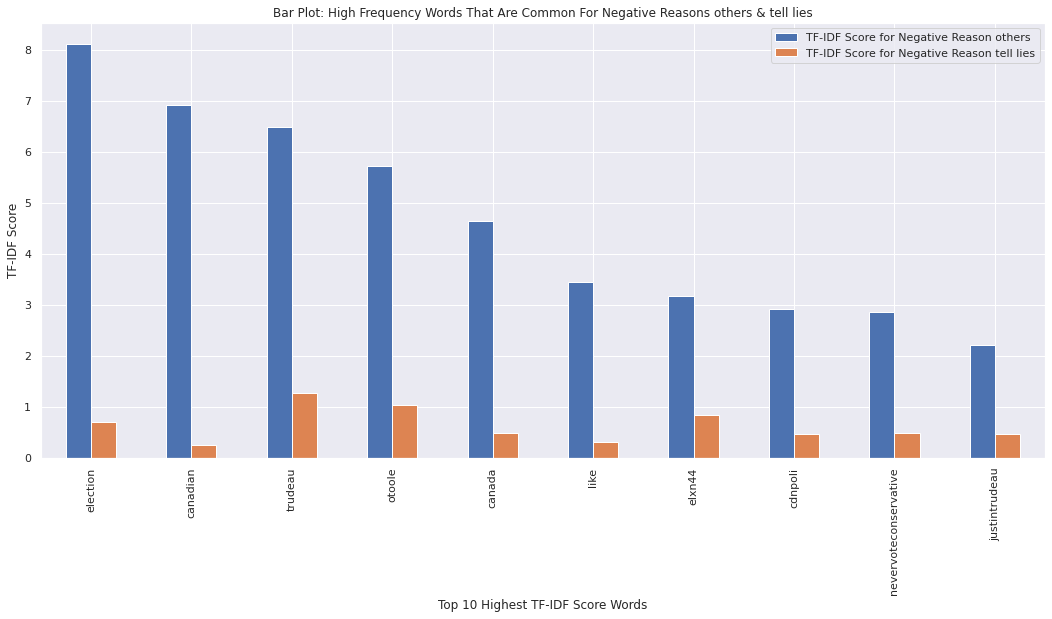

In [119]:
# Plotting the Bar Plot for each DataFrame 
ax = IJ_DF12.plot(x="Word", y=["TF-IDF Score for Negative Reason others", "TF-IDF Score for Negative Reason calling election early"], kind="bar",figsize=(18,8), 
                  title='Bar Plot: High Frequency Words That Are Common For Negative Reasons others & calling election early')
ax.set_xlabel("Top 10 Highest TF-IDF Score Words")
ax.set_ylabel("TF-IDF Score")

ax1 = IJ_DF13.plot(x="Word", y=["TF-IDF Score for Negative Reason others", "TF-IDF Score for Negative Reason gun control"], kind="bar",figsize=(18,8), 
                   title='Bar Plot: High Frequency Words That Are Common For Negative Reasons others & gun control')
ax1.set_xlabel("Top 10 Highest TF-IDF Score Words")
ax1.set_ylabel("TF-IDF Score")

ax2 = IJ_DF14.plot(x="Word", y=["TF-IDF Score for Negative Reason others", "TF-IDF Score for Negative Reason tell lies"], kind="bar",figsize=(18,8), 
                   title='Bar Plot: High Frequency Words That Are Common For Negative Reasons others & tell lies')
ax2.set_xlabel("Top 10 Highest TF-IDF Score Words")
ax2.set_ylabel("TF-IDF Score")

#### Finding the TOP high frequency words in the the negative Canadian elections tweets

In [120]:
# Printing the first 5 rows of the DataFrame
CElec_2021_DF_Neg.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes take away opposition leader chosen obstruction 20 no...,0.0,1
1,hope trudeau loses canadian election tomorrow called snap one thinking ’ romp seems people ’ lik...,0.0,3
3,canadian friend never forget trudeau 2 year mandate called completely unnecessary election right...,0.0,1
5,vaccine amp gun key election otoole serious plan get canadian vaccinated cant even get candidate...,0.0,3
6,’ sorry moderator respond leadership candidate ’ debate farce frankly disservice canadian awful ...,0.0,0


In [121]:
# Initiating TF IDF vectorizer to convert raw documents to a matrix of TF-IDF feature 
vectorizer = TfidfVectorizer()

# Fitting the tweets from the negative Canadian elections data: 
Negative_Vectorize = vectorizer.fit_transform(CElec_2021_DF_Neg["text"]) 

# Summing along axis 0 (vertical axis) to get the total TF-IDF score for each word in the Entire DataFrame
Freq_Score = np.sum(Negative_Vectorize.toarray(),axis=0).tolist()

# Putting the TF-IDF score for each word in a DataFrame

Dictionary = dict(zip(vectorizer.get_feature_names(), Freq_Score))                          # Creating the dictinary for the DataFrame
DF_Top_Score = pd.DataFrame.from_dict(Dictionary, orient='index').reset_index(level=0)      # Making the DataFrame
DF_Top_Score.rename(columns = {'index':'Word', 0:'TF-IDF Score'}, inplace = True)           # Changing the DataFrame Column names 
DF_Top_Score = DF_Top_Score.sort_values('TF-IDF Score', ascending = False).reset_index().drop(columns = ["index"])
DF_Top_Score.head()

,Word,TF-IDF Score
0,election,18.920729
1,canadian,16.963006
2,trudeau,15.945213
3,otoole,12.694904
4,canada,9.739163


In [122]:
# Finding how much words is in the DataFrame
print("Amount of words in DF_Top_Score is:", DF_Top_Score.shape[0])

Amount of words in DF_Top_Score is: 2402


In [123]:
# Finding the amount of words in the DataFrame that have TF-IDF Score above 0.5
DF_Top_Score[DF_Top_Score["TF-IDF Score"]>0.5].shape[0]

708

It is impotant to note that the higher the TF-IDF score the more important or relevant the term is; as a term gets less relevant, its TF-IDF score will approach 0.

Ref: https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/